$\textbf{____________________________________________________________________________________________________________________}$

# FACE Project Data Analysis and ODEs
    
# Ch. 2 - 3 (p 3 - 17): https://www.proquest.com/docview/2685050870?pq-origsite=gscholar&fromopenview=true
    
$$$$
    
$\underline{\text{Contents}}$
    
$\textbf{PRELIMINARIES}$
    
$\textbf{1. NONLINEAR REGRESSION: D13C VS. TIME}$
    
$\textbf{2. LINEAR REGRESSION: CURVE EXPONENTS (DECAY RATES) VS. ROOT DIAMETER}$

$\; \; \; \; \textbf{2.1) DECAY RATE DISTRIBUTIONS}$
    
$\; \; \; \; \textbf{2.2) BOX PLOTS}$ 
    
$\; \; \; \; \textbf{2.3) VIOLIN PLOTS}$
   
$\; \; \; \; \textbf{2.4) SHORT-TERM DECAY RATE STATISTICS}$
    
$\textbf{3. ODE MODEL}$
    
$\textbf{4. ROOT DIAMETER}$
    
$\textbf{____________________________________________________________________________________________________________________}$

Authors: Luke Vaughan, Daniel Poll, Allan Strand, Seth Pritchard
    
College of Charleston
    
Spring 2022
    
# PRELIMINARIES

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [2]:
from platform import python_version
print(python_version())

3.8.5


In [3]:
#Import data

df = pd.read_excel(r'C:/Users/lukev/Downloads/face_datasetf.xlsx')  

In [4]:
#Find rows with 'nan' (AvgDiam.mm)

pre_all_diams = df["AvgDiam.mm"].to_numpy()        #make array of average diameter values

nans = np.argwhere(np.isnan(pre_all_diams))        #make array with inner array of indeces where 'nan' occurs
print('Rows with nan:')
print(nans)                                        #view array with inner array
print(pre_all_diams[nans])                         #check that 'nan' occurs as predicted
print('')
print('Extract indeces:')

#Extract inner array

for i in range(len(nans)):
    prenansvals = nans[i]                              
    
#Extract indeces (raw values)   

for i in range(len(prenansvals)):
    nansvals = prenansvals[i]

print(prenansvals)
print(nansvals)

Rows with nan:
[[204]]
[[nan]]

Extract indeces:
[204]
204


In [5]:
#View data set before deleting rows with 'nan'
#Only one row with 'nan:' 204

df.iloc[nansvals-1:nansvals+2]             

,Date Sent off for analysis,CO2Treatment,NTreatment,Monolith,N.index,Date Sampled,Order,Biomass.g,Length.cm,SRL.cm.g,AvgDiam.mm,CNSampleAmount.mg,d13C,C.mg,%C,d15N,N.mg,%N,C:N,Notes
203,2014-08-19,Elevated,Fertilized,7_2,3.81,2011-06-01,5,0.02850,6.2484,219.242105,1.1539,4.95,-35.333139,2.285319,46.168055,-2.991417,0.047381,0.957189,48.232947,NaN
204,2014-08-19,Elevated,Unfertilized,2_3,2.91,2011-06-01,1,0.01416,NaN,NaN,NaN,4.30,-35.768817,2.017394,46.916141,15.034329,0.056164,1.306139,35.919721,NaN
205,2014-08-19,Elevated,Unfertilized,2_3,2.91,2011-06-01,2,0.00520,13.7679,2647.673077,0.4011,4.29,-36.481568,2.060299,48.025609,16.232894,0.044201,1.030327,46.612010,NaN


In [6]:
#View data set after deleting rows with 'nan'
#Row indeces jump from 203 to 205

df = df.drop(index=nansvals)
df.iloc[nansvals-1:nansvals+2]

,Date Sent off for analysis,CO2Treatment,NTreatment,Monolith,N.index,Date Sampled,Order,Biomass.g,Length.cm,SRL.cm.g,AvgDiam.mm,CNSampleAmount.mg,d13C,C.mg,%C,d15N,N.mg,%N,C:N,Notes
203,2014-08-19,Elevated,Fertilized,7_2,3.81,2011-06-01,5,0.02850,6.2484,219.242105,1.1539,4.95,-35.333139,2.285319,46.168055,-2.991417,0.047381,0.957189,48.232947,NaN
205,2014-08-19,Elevated,Unfertilized,2_3,2.91,2011-06-01,2,0.00520,13.7679,2647.673077,0.4011,4.29,-36.481568,2.060299,48.025609,16.232894,0.044201,1.030327,46.612010,NaN
206,2014-08-19,Elevated,Unfertilized,2_3,2.91,2011-06-01,3,0.00548,13.7679,2512.390511,0.4010,4.75,-39.894144,2.287429,48.156409,14.295961,0.048899,1.029444,46.779064,NaN


In [7]:
#BOOLEANS

#Unfertilized/ambient from 2013

order1_111 = (df["Order"] == 1) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')
order2_111 = (df["Order"] == 2) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')
order3_111 = (df["Order"] == 3) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')
order4_111 = (df["Order"] == 4) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')
order5_111 = (df["Order"] == 5) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')

#Fertilized/ambient from 2013

order1_112 = (df["Order"] == 1) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')
order2_112 = (df["Order"] == 2) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')
order3_112 = (df["Order"] == 3) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')
order4_112 = (df["Order"] == 4) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')
order5_112 = (df["Order"] == 5) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')

#Unfertilized/elevated from 2013

order1_121 = (df["Order"] == 1) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')
order2_121 = (df["Order"] == 2) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')
order3_121 = (df["Order"] == 3) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')
order4_121 = (df["Order"] == 4) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')
order5_121 = (df["Order"] == 5) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')

#Fertilized/elevated from 2013

order1_122 = (df["Order"] == 1) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')
order2_122 = (df["Order"] == 2) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')
order3_122 = (df["Order"] == 3) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')
order4_122 = (df["Order"] == 4) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')
order5_122 = (df["Order"] == 5) & \
                (df["Date Sent off for analysis"] == '2013-11-15') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')

#Unfertilized/ambient from 2014

order1_211 = (df["Order"] == 1) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')
order2_211 = (df["Order"] == 2) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')
order3_211 = (df["Order"] == 3) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')
order4_211 = (df["Order"] == 4) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')
order5_211 = (df["Order"] == 5) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Unfertilized')

#Fertilized/ambient from 2014

order1_212 = (df["Order"] == 1) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')
order2_212 = (df["Order"] == 2) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')
order3_212 = (df["Order"] == 3) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')
order4_212 = (df["Order"] == 4) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')
order5_212 = (df["Order"] == 5) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Ambient') & \
                (df["NTreatment"] == 'Fertilized')

#Unfertilized/elevated from 2014

order1_221 = (df["Order"] == 1) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')
order2_221 = (df["Order"] == 2) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')
order3_221 = (df["Order"] == 3) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')
order4_221 = (df["Order"] == 4) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')
order5_221 = (df["Order"] == 5) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Unfertilized')

#Fertilized/elevated from 2014

order1_222 = (df["Order"] == 1) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')
order2_222 = (df["Order"] == 2) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')
order3_222 = (df["Order"] == 3) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')
order4_222 = (df["Order"] == 4) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')
order5_222 = (df["Order"] == 5) & \
                (df["Date Sent off for analysis"] == '2014-08-19') & \
                (df["CO2Treatment"] == 'Elevated') & \
                (df["NTreatment"] == 'Fertilized')

## Array Names

Unfertilized, ambient: ua

Unfertilized, elevated: ue

Fertilized, ambient: fa

Fertilized, elevated: fe

In [8]:
#Unfertilized d13C
#Each array has 5 inner arrays

all_uad13C_2013 = [df["d13C"][order1_111].to_numpy(),df["d13C"][order2_111].to_numpy(),df["d13C"][order3_111].to_numpy(),df["d13C"][order4_111].to_numpy(),df["d13C"][order5_111].to_numpy()]
all_ued13C_2013 = [df["d13C"][order1_121].to_numpy(),df["d13C"][order2_121].to_numpy(),df["d13C"][order3_121].to_numpy(),df["d13C"][order4_121].to_numpy(),df["d13C"][order5_121].to_numpy()]
all_uad13C_2014 = [df["d13C"][order1_211].to_numpy(),df["d13C"][order2_211].to_numpy(),df["d13C"][order3_211].to_numpy(),df["d13C"][order4_211].to_numpy(),df["d13C"][order5_211].to_numpy()]
all_ued13C_2014 = [df["d13C"][order1_221].to_numpy(),df["d13C"][order2_221].to_numpy(),df["d13C"][order3_221].to_numpy(),df["d13C"][order4_221].to_numpy(),df["d13C"][order5_221].to_numpy()]

In [9]:
#Fertilized d13C
#Each array has 5 inner arrays

all_fad13C_2013 = [df["d13C"][order1_112].to_numpy(),df["d13C"][order2_112].to_numpy(),df["d13C"][order3_112].to_numpy(),df["d13C"][order4_112].to_numpy(),df["d13C"][order5_112].to_numpy()]
all_fed13C_2013 = [df["d13C"][order1_122].to_numpy(),df["d13C"][order2_122].to_numpy(),df["d13C"][order3_122].to_numpy(),df["d13C"][order4_122].to_numpy(),df["d13C"][order5_122].to_numpy()]
all_fad13C_2014 = [df["d13C"][order1_212].to_numpy(),df["d13C"][order2_212].to_numpy(),df["d13C"][order3_212].to_numpy(),df["d13C"][order4_212].to_numpy(),df["d13C"][order5_212].to_numpy()]
all_fed13C_2014 = [df["d13C"][order1_222].to_numpy(),df["d13C"][order2_222].to_numpy(),df["d13C"][order3_222].to_numpy(),df["d13C"][order4_222].to_numpy(),df["d13C"][order5_222].to_numpy()]

# 1. NONLINEAR REGRESSION: D13C VS. TIME
    
$$$$

3 time points $(t = 0, 0.5, 9.5 \; \text{months})$ are relevant. "Part A" refers to times $t = 0$ and $t = 0.5$ plotted together. "Part B" refers to times $t = 0$ and $t = 9.5$.

$$$$

## Part A (All Orders, Elevated Only): Unfertilized

In [10]:
#Get all orders
 
vec_ued13C_2013 = np.concatenate([all_ued13C_2013[0],all_ued13C_2013[1],all_ued13C_2013[2],all_ued13C_2013[3],all_ued13C_2013[4]])

In [11]:
#Part A: Month 0 to 0.5

start_ued13C_2013 = -42.6                                          

#Coordinate points (t,x)

ued13C_month0_A = [0.,start_ued13C_2013]                           #coordinate point for t = 0

ued13C_month0_5_A = np.empty((len(vec_ued13C_2013),2), float)      #coordinate points for t = 0.5
for i in range(len(vec_ued13C_2013)):
    ued13C_month0_5_A[i,0] = 0.5                                   #plotting x vs. t: each t-coord is 0.5
    ued13C_month0_5_A[i,1] = vec_ued13C_2013[i]                    #each x-coord is a d13C value

#Check lengths

print(len(ued13C_month0_5_A))           #number of pairs of coordinate points
print(len(vec_ued13C_2013))             #number of d13C values

55
55


In [12]:
#One-pool model: define function

d13C_eq = -27.0                         

def onepool(t,A,k):
    return A*np.exp(k*t) + d13C_eq

(-50.0, -25.0)

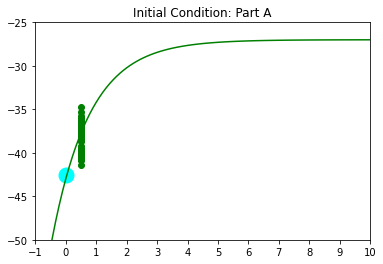

In [13]:
#Initial condition for nonlinear regression  

ueguess_A = [-16,-0.8]                                          

#Use onepool function

ts_A = np.linspace(-1,10,100)
uexs_A = onepool(ts_A,ueguess_A[0],ueguess_A[1])                #plug guesses into onepool function   

#Month 0

plt.plot(ued13C_month0_A[0],ued13C_month0_A[1],'o',markersize=15,color='cyan')       

#Month 0.5

plt.scatter(*zip(*ued13C_month0_5_A),color='green')             #plt.scatter(t-coords,x-coords) via *zip              

#Plot initial condition

plt.plot(ts_A,uexs_A,color='green')
plt.title('Initial Condition: Part A')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.xlim((-1,10))
plt.ylim((-50,-25))

In [14]:
#Arrays for nonlinear regression
    
reg_tsue_A = np.array([0.])                                          #first value is 0
for i in range(len(ued13C_month0_5_A)):
    reg_tsue_A = np.append(reg_tsue_A, ued13C_month0_5_A[i,0])       #remaining values are 0.5

reg_xsue_A = np.array([ued13C_month0_A[1]])                          #first value is start_ued13C_2013 (-42.6)
for i in range(len(ued13C_month0_5_A)):
    reg_xsue_A = np.append(reg_xsue_A, ued13C_month0_5_A[i,1])       #remaining values are x-coords from ued13C_month0_5_A
    
#######################################################################################################################    

#Nonlinear regression multiple times via curve_fit
#Parameter values A, k reported in ce_A via vals1 (vals2 not used: included as a formality of using curve_fit)
#Curve for each pair of points provided via nonlinear regression (point at t = 0 paired with first point at t = 0.5...
#...then point at t = 0 paired with second point at t = 0.5... etc.)

#######################################################################################################################

#Store A and k values in ce_A

ce_A = []                                        

#Nonlinear regression multiple times

for i in range(len(reg_tsue_A)-1):                                   
    vals1, vals2 = curve_fit(onepool, [reg_tsue_A[0],reg_tsue_A[i+1]], [reg_xsue_A[0],reg_xsue_A[i+1]], ueguess_A)
    ce_A.append(vals1) 
    
#Store exponents
    
ks_ue_A = []
for i in range(len(ce_A)):
    ks_ue_A = np.append(ks_ue_A, ce_A[i][1])     #ce_A is an array with inner arrays (A,k)
    
#Check lengths

print(len(ued13C_month0_5_A))
print(len(ce_A))
print(len(ks_ue_A))

55
55
55


C:\Users\lukev\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


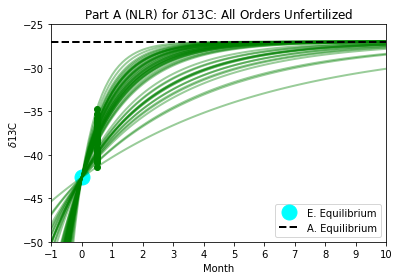

<Figure size 432x288 with 0 Axes>

In [15]:
#Plot for Part A

ued13C_partAfig = plt.figure()

plt.plot(ued13C_month0_A[0],ued13C_month0_A[1],'o',markersize=15,color='cyan',label='E. Equilibrium')     #replot

uexs_A = np.zeros((len(ce_A),len(ts_A)),dtype='float')                   #REDEFINED array with inner arrays (one for each curve)

#Fill each inner array with outputs from onepool function

for i in range(len(ce_A)):
    uexs_A[i,:] = onepool(ts_A,ce_A[i][0],ce_A[i][1])                    #plug A and k values into onepool function

#Plot each curve    
    
for i in range(len(ce_A)):
    plt.plot(ts_A,uexs_A[i],color='green',linewidth=2,alpha=0.4)         #plt.plot(ts_A, inner array) for each inner array

plt.scatter(*zip(*ued13C_month0_5_A),color='green')                      #rescatter

#Equilibrium

showd13C_eq = d13C_eq*np.ones(len(ts_A))
plt.plot(ts_A,showd13C_eq,'k--',linewidth=2,label='A. Equilibrium')         

#Format

plt.title('Part A (NLR) for $\delta$13C: All Orders Unfertilized')
plt.legend()
plt.xlabel('Month')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C')
plt.xlim((-1,10))                                                        
plt.ylim((-50.0,-25.0))

ued13C_partAfig = plt.gcf()
plt.show()
plt.draw()
ued13C_partAfig.savefig("ued13C_partAfig.png",dpi=100)

## Part B (All Orders, Elevated Only): Unfertilized

In [16]:
#Get all orders

vec_ued13C_2014 = np.concatenate([all_ued13C_2014[0],all_ued13C_2014[1],all_ued13C_2014[2],all_ued13C_2014[3],all_ued13C_2014[4]])

In [17]:
#Part B: Month 0 to 9.5

#Coordinate points (t,x)

ued13C_month0_B = [0.,start_ued13C_2013]                            #coordinate point for t = 0

ued13C_month9_5_B = np.empty((len(vec_ued13C_2014),2), float)       #coordinate points for t = 9.5
for i in range(len(vec_ued13C_2014)):
    ued13C_month9_5_B[i,0] = 9.5
    ued13C_month9_5_B[i,1] = vec_ued13C_2014[i]             
    
#Check lengths

print(len(ued13C_month9_5_B))           
print(len(vec_ued13C_2014))      

113
113


(-50.0, -25.0)

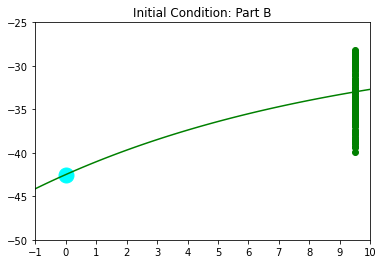

In [18]:
#Nonlinear regression process needs initial condition

ueguess_B = [-15.5,-0.1]

#Use onepool function

ts_B = np.linspace(-1,10,100)
uexs_B = onepool(ts_B,ueguess_B[0],ueguess_B[1])

#Month 0
   
plt.plot(ued13C_month0_B[0],ued13C_month0_B[1],'o',markersize=15,color='cyan')

#Month 9.5
    
plt.scatter(*zip(*ued13C_month9_5_B),color='green')   

#Plot initial condition

plt.plot(ts_B,uexs_B,color='green')  
plt.title('Initial Condition: Part B')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.xlim((-1,10))
plt.ylim((-50,-25))

In [19]:
#Arrays for nonlinear regression
    
reg_tsue_B = np.array([0.])
for i in range(len(ued13C_month9_5_B)):
    reg_tsue_B = np.append(reg_tsue_B, ued13C_month9_5_B[i,0])

reg_xsue_B = np.array([ued13C_month0_B[1]])
for i in range(len(ued13C_month9_5_B)):
    reg_xsue_B = np.append(reg_xsue_B, ued13C_month9_5_B[i,1])
    
#Store A and k values in ce_B
    
ce_B = []

#Nonlinear regression multiple times

for i in range(len(reg_tsue_B)-1):  
    vals1, vals2 = curve_fit(onepool, [reg_tsue_B[0],reg_tsue_B[i+1]], [reg_xsue_B[0],reg_xsue_B[i+1]], ueguess_B)
    ce_B.append(vals1)
    
#Store exponents    

ks_ue_B = []
for i in range(len(ce_B)):
    ks_ue_B = np.append(ks_ue_B, ce_B[i][1])
    
#Check lengths

print(len(ued13C_month9_5_B))
print(len(ce_B))
print(len(ks_ue_B))

113
113
113


C:\Users\lukev\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


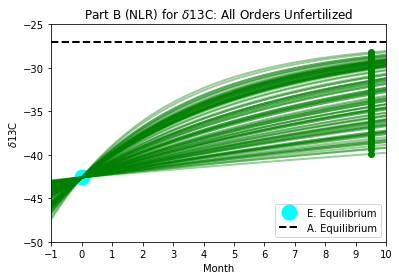

<Figure size 432x288 with 0 Axes>

In [20]:
#Plot for Part B

ued13C_partBfig = plt.figure()

plt.plot(ued13C_month0_B[0],ued13C_month0_B[1],'o',markersize=15,color='cyan',label='E. Equilibrium')

uexs_B = np.zeros((len(ce_B),len(ts_B)),dtype='float')                       #REDEFINED

#Fill each inner array with outputs from onepool function

for i in range(len(ce_B)):
    uexs_B[i,:] = onepool(ts_B,ce_B[i][0],ce_B[i][1])
    
#Plot each curve
    
for i in range(len(ce_B)):
    plt.plot(ts_B,uexs_B[i],color='green',linewidth=2,alpha=0.4)

plt.scatter(*zip(*ued13C_month9_5_B),color='green')

#Equilibrium

plt.plot(ts_B,showd13C_eq,'k--',linewidth=2,label='A. Equilibrium')

#Format

plt.title('Part B (NLR) for $\delta$13C: All Orders Unfertilized')
plt.legend()
plt.xlabel('Month')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C')
plt.xlim((-1,10))
plt.ylim((-50.0,-25.0))

ued13C_partBfig = plt.gcf()
plt.show()
plt.draw()
ued13C_partBfig.savefig("ued13C_partBfig.png",dpi=100)

## Part A (All Orders, Elevated Only): Fertilized

In [21]:
#Get all orders
 
vec_fed13C_2013 = np.concatenate([all_fed13C_2013[0],all_fed13C_2013[1],all_fed13C_2013[2],all_fed13C_2013[3],all_fed13C_2013[4]])

In [22]:
#Part A: Month 0 to 0.5

#Coordinate points (t,x)

start_fed13C_2013 = start_ued13C_2013
fed13C_month0_A = [0.,start_fed13C_2013]                              #coordinate point for t = 0

fed13C_month0_5_A = np.empty((len(vec_fed13C_2013),2), float)         #coordinate points for t = 0.5
for i in range(len(vec_fed13C_2013)):
    fed13C_month0_5_A[i,0] = 0.5
    fed13C_month0_5_A[i,1] = vec_fed13C_2013[i]

#Check lengths    

print(len(fed13C_month0_5_A))           
print(len(vec_fed13C_2013))  

54
54


(-50.0, -25.0)

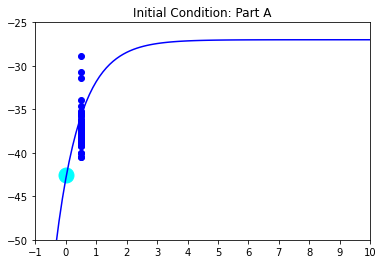

In [23]:
#Nonlinear regression process needs initial condition

feguess_A = [-16,-1.2]

#Use onepool function

fexs_A = onepool(ts_A,feguess_A[0],feguess_A[1])

#Month 0

plt.plot(fed13C_month0_A[0],fed13C_month0_A[1],'o',markersize=15,color='cyan')  

#Month 0.5

plt.scatter(*zip(*fed13C_month0_5_A),color='blue')    

#Plot initial condition

plt.plot(ts_A,fexs_A,color='blue')     
plt.title('Initial Condition: Part A')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.xlim((-1,10))
plt.ylim((-50,-25))

In [24]:
#Arrays for nonlinear regression
    
reg_tsfe_A = np.array([0.])
for i in range(len(fed13C_month0_5_A)):
    reg_tsfe_A = np.append(reg_tsfe_A, fed13C_month0_5_A[i,0])

reg_xsfe_A = np.array([fed13C_month0_A[1]])
for i in range(len(fed13C_month0_5_A)):
    reg_xsfe_A = np.append(reg_xsfe_A, fed13C_month0_5_A[i,1])

#Store A and k values in ce_A    

ce_A = []                               #ce_A used previously for unfertilized d13C: REDEFINED here

#Nonlinear regression multiple times

for i in range(len(reg_tsfe_A)-1):  
    vals1, vals2 = curve_fit(onepool, [reg_tsfe_A[0],reg_tsfe_A[i+1]], [reg_xsfe_A[0],reg_xsfe_A[i+1]], feguess_A)
    ce_A.append(vals1)
    
#Store exponents    
    
ks_fe_A = []
for i in range(len(ce_A)):
    ks_fe_A = np.append(ks_fe_A, ce_A[i][1])
    
#Check lengths

print(len(fed13C_month0_5_A))
print(len(ce_A))
print(len(ks_fe_A))

54
54
54


C:\Users\lukev\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


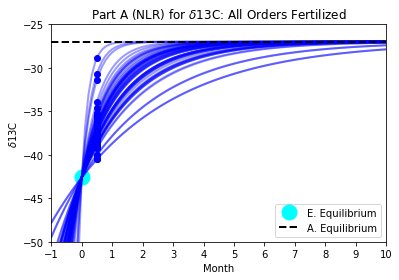

<Figure size 432x288 with 0 Axes>

In [25]:
#Plot for Part A

fed13C_partAfig = plt.figure()

plt.plot(fed13C_month0_A[0],fed13C_month0_A[1],'o',markersize=15,color='cyan',label='E. Equilibrium')

fexs_A = np.zeros((len(ce_A),len(ts_A)),dtype='float')                      #REDEFINED

#Fill each inner array with outputs from onepool function

for i in range(len(ce_A)):
    fexs_A[i,:] = onepool(ts_A,ce_A[i][0],ce_A[i][1])
    
#Plot each curve
    
for i in range(len(ce_A)):
    plt.plot(ts_A,fexs_A[i],color='blue',linewidth=2,alpha=0.4)

plt.scatter(*zip(*fed13C_month0_5_A),color='blue')

#Equilibrium

plt.plot(ts_A,showd13C_eq,'k--',linewidth=2,label='A. Equilibrium')

#Format

plt.title('Part A (NLR) for $\delta$13C: All Orders Fertilized')
plt.legend()
plt.xlabel('Month')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C')
plt.xlim((-1,10))
plt.ylim((-50.0,-25.0))

fed13C_partAfig = plt.gcf()
plt.show()
plt.draw()
fed13C_partAfig.savefig("fed13C_partAfig.png",dpi=100)

## Part B (All Orders, Elevated Only): Fertilized

In [26]:
#Get all orders
 
vec_fed13C_2014 = np.concatenate([all_fed13C_2014[0],all_fed13C_2014[1],all_fed13C_2014[2],all_fed13C_2014[3],all_fed13C_2014[4]])

In [27]:
#Part B: Month 0 to 9.5 

#Coordinate points (t,x)

fed13C_month0_B = [0.,start_fed13C_2013]                            #coordinate point for t = 0

fed13C_month9_5_B = np.empty((len(vec_fed13C_2014),2), float)       #coordinate points for t = 9.5
for i in range(len(vec_fed13C_2014)):
    fed13C_month9_5_B[i,0] = 9.5
    fed13C_month9_5_B[i,1] = vec_fed13C_2014[i]

#Check lengths

print(len(fed13C_month9_5_B))           
print(len(vec_fed13C_2014))  

123
123


(-50.0, -25.0)

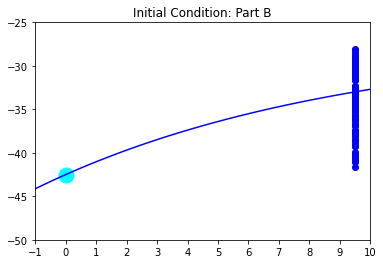

In [28]:
#Nonlinear regression process needs initial condition

feguess_B = [-15.5,-0.1]

#Use onepool function

fexs_B = onepool(ts_B,feguess_B[0],feguess_B[1])            

#Month 0
   
plt.plot(fed13C_month0_B[0],fed13C_month0_B[1],'o',markersize=15,color='cyan')
    
#Month 9.5

plt.scatter(*zip(*fed13C_month9_5_B),color='blue')   

#Plot initial condition

plt.plot(ts_B,fexs_B,color='blue')  
plt.title('Initial Condition: Part B')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.xlim((-1,10))
plt.ylim((-50,-25))

In [29]:
#Arrays for nonlinear regression
    
reg_tsfe_B = np.array([0.])
for i in range(len(fed13C_month9_5_B)):
    reg_tsfe_B = np.append(reg_tsfe_B, fed13C_month9_5_B[i,0])

reg_xsfe_B = np.array([fed13C_month0_B[1]])
for i in range(len(fed13C_month9_5_B)):
    reg_xsfe_B = np.append(reg_xsfe_B, fed13C_month9_5_B[i,1])
    
#Store A and k values in ce_B
    
ce_B = []                             #ce_B used previously for unfertilized d13C: REDEFINED here

#Nonlinear regression multiple times

for i in range(len(reg_tsfe_B)-1):  
    vals1, vals2 = curve_fit(onepool, [reg_tsfe_B[0],reg_tsfe_B[i+1]], [reg_xsfe_B[0],reg_xsfe_B[i+1]], feguess_B)
    ce_B.append(vals1)
    
#Store exponents    

ks_fe_B = []
for i in range(len(ce_B)):
    ks_fe_B = np.append(ks_fe_B, ce_B[i][1])
    
#Check lengths

print(len(fed13C_month9_5_B))
print(len(ce_B))
print(len(ks_fe_B))

123
123
123


C:\Users\lukev\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


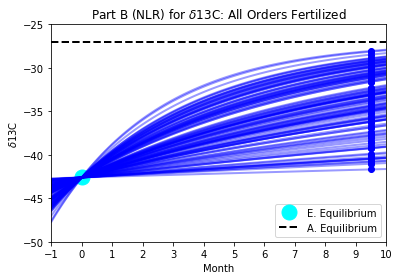

<Figure size 432x288 with 0 Axes>

In [30]:
#Plot for Part B

fed13C_partBfig = plt.figure()

plt.plot(fed13C_month0_B[0],fed13C_month0_B[1],'o',markersize=15,color='cyan',label='E. Equilibrium')

fexs_B = np.zeros((len(ce_B),len(ts_B)),dtype='float')                       #REDEFINED

#Fill each inner array with outputs from onepool function

for i in range(len(ce_B)):
    fexs_B[i,:] = onepool(ts_B,ce_B[i][0],ce_B[i][1])
    
#Plot each curve
    
for i in range(len(ce_B)):
    plt.plot(ts_B,fexs_B[i],color='blue',linewidth=2,alpha=0.4)

plt.scatter(*zip(*fed13C_month9_5_B),color='blue')

#Equilibrium

plt.plot(ts_B,showd13C_eq,'k--',linewidth=2,label='A. Equilibrium')

#Format

plt.title('Part B (NLR) for $\delta$13C: All Orders Fertilized')
plt.legend()
plt.xlabel('Month')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C')
plt.xlim((-1,10))
plt.ylim((-50.0,-25.0))

fed13C_partBfig = plt.gcf()
plt.show()
plt.draw()
fed13C_partBfig.savefig("fed13C_partBfig.png",dpi=100)

## Part A (All Orders, Elevated Only): Both Unfertilized and Fertilized

In [31]:
#Both unfertilized and fertilized

bothed13C_month0_A = [0.,start_ued13C_2013] 
bothed13C_month0_5_A = np.concatenate([ued13C_month0_5_A,fed13C_month0_5_A])

(-50.0, -25.0)

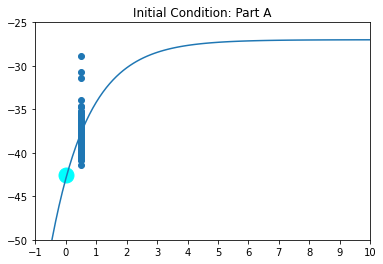

In [32]:
#Nonlinear regression process needs initial condition 

botheguess_A = [-16,-0.8]                                          

#Use onepool function

bothexs_A = onepool(ts_A,botheguess_A[0],botheguess_A[1])                  

#Month 0

plt.plot(bothed13C_month0_A[0],bothed13C_month0_A[1],'o',markersize=15,color='cyan')       

#Month 0.5
        
plt.scatter(*zip(*bothed13C_month0_5_A))                        

#Plot initial condition

plt.plot(ts_A,bothexs_A)
plt.title('Initial Condition: Part A')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.xlim((-1,10))
plt.ylim((-50,-25))

In [33]:
#Arrays for nonlinear regression
    
reg_tsbothe_A = np.array([0.])
for i in range(len(bothed13C_month0_5_A)):
    reg_tsbothe_A = np.append(reg_tsbothe_A, bothed13C_month0_5_A[i,0])

reg_xsbothe_A = np.array([bothed13C_month0_A[1]])
for i in range(len(bothed13C_month0_5_A)):
    reg_xsbothe_A = np.append(reg_xsbothe_A, bothed13C_month0_5_A[i,1])

#Store A and k values in ce_A    

ce_A = []                               #ce_A used previously: REDEFINED here

#Nonlinear regression multiple times

for i in range(len(reg_tsbothe_A)-1):  
    vals1, vals2 = curve_fit(onepool, [reg_tsbothe_A[0],reg_tsbothe_A[i+1]], [reg_xsbothe_A[0],reg_xsbothe_A[i+1]], botheguess_A)
    ce_A.append(vals1)
    
#Store exponents    
    
ks_bothe_A = []
for i in range(len(ce_A)):
    ks_bothe_A = np.append(ks_bothe_A, ce_A[i][1])
    
#Check lengths

print(len(bothed13C_month0_5_A))
print(len(ce_A))
print(len(ks_bothe_A))

109
109
109


C:\Users\lukev\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


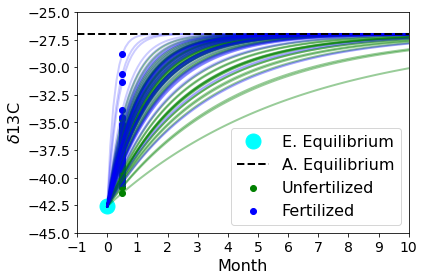

<Figure size 432x288 with 0 Axes>

In [34]:
#Plot for Part A

bothed13C_partAfig = plt.figure()

ts_Anew = np.linspace(0,10,100)

plt.plot(bothed13C_month0_A[0],bothed13C_month0_A[1],'o',markersize=15,color='cyan',label='E. Equilibrium')

bothexs_A = np.zeros((len(ce_A),len(ts_Anew)),dtype='float')                      

#Fill each inner array with outputs from onepool function

for i in range(len(ce_A)):
    bothexs_A[i,:] = onepool(ts_Anew,ce_A[i][0],ce_A[i][1])
    
#Plot each curve
    
for i in range(len(ued13C_month0_5_A)):                                        #unfertilized curves
    plt.plot(ts_Anew,bothexs_A[i],color='green',linewidth=2,alpha=0.4)
    
for i in range(len(ued13C_month0_5_A),len(bothed13C_month0_5_A)):              #remaining curves: fertilized
    plt.plot(ts_Anew,bothexs_A[i],color='blue',linewidth=2,alpha=0.2)

plt.scatter(*zip(*ued13C_month0_5_A),color='green',label='Unfertilized')
plt.scatter(*zip(*fed13C_month0_5_A),color='blue',label='Fertilized')

#Equilibrium

plt.plot(ts_A,showd13C_eq,'k--',linewidth=2,label='A. Equilibrium')

#Format

plt.legend(prop={'size': 16})
plt.xlabel('Month',fontsize=16)
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C',fontsize=16)
plt.xlim((-1,10))
plt.ylim((-45.0,-25.0))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

bothed13C_partAfig = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
bothed13C_partAfig.savefig("bothed13C_partAfig.png",dpi=100)

## Part B (All Orders, Elevated Only): Both Unfertilized and Fertilized 

In [35]:
#Both unfertilized and fertilized

bothed13C_month0_B = [0.,start_ued13C_2013] 
bothed13C_month9_5_B = np.concatenate([ued13C_month9_5_B,fed13C_month9_5_B])

(-50.0, -25.0)

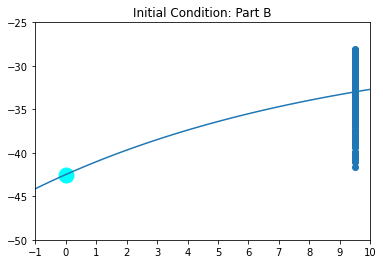

In [36]:
#Nonlinear regression process needs initial condition 

botheguess_B = [-15.5,-0.1]                                          

#Use onepool function

bothexs_B = onepool(ts_A,botheguess_B[0],botheguess_B[1])                  

#Month 0

plt.plot(bothed13C_month0_B[0],bothed13C_month0_B[1],'o',markersize=15,color='cyan')       

#Month 0.5
       
plt.scatter(*zip(*bothed13C_month9_5_B))                        

#Plot initial condition

plt.plot(ts_A,bothexs_B)
plt.title('Initial Condition: Part B')
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.xlim((-1,10))
plt.ylim((-50,-25))

In [37]:
#Arrays for nonlinear regression
    
reg_tsbothe_B = np.array([0.])
for i in range(len(bothed13C_month9_5_B)):
    reg_tsbothe_B = np.append(reg_tsbothe_B, bothed13C_month9_5_B[i,0])

reg_xsbothe_B = np.array([bothed13C_month0_B[1]])
for i in range(len(bothed13C_month9_5_B)):
    reg_xsbothe_B = np.append(reg_xsbothe_B, bothed13C_month9_5_B[i,1])

#Store A and k values in ce_B    

ce_B = []                               #ce_B used previously: REDEFINED here

#Nonlinear regression multiple times

for i in range(len(reg_tsbothe_B)-1):  
    vals1, vals2 = curve_fit(onepool, [reg_tsbothe_B[0],reg_tsbothe_B[i+1]], [reg_xsbothe_B[0],reg_xsbothe_B[i+1]], botheguess_B)
    ce_B.append(vals1)
    
#Store exponents    
    
ks_bothe_B = []
for i in range(len(ce_B)):
    ks_bothe_B = np.append(ks_bothe_B, ce_B[i][1])
    
#Check lengths

print(len(bothed13C_month9_5_B))
print(len(ce_B))
print(len(ks_bothe_B))

236
236
236


C:\Users\lukev\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


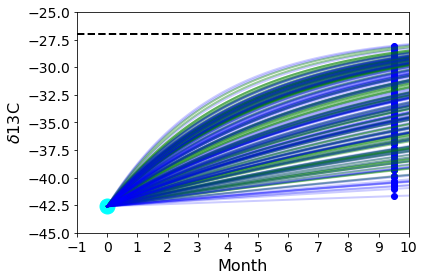

<Figure size 432x288 with 0 Axes>

In [38]:
#Plot for Part B

bothed13C_partBfig = plt.figure()

ts_Bnew = np.linspace(0,10,100)

plt.plot(bothed13C_month0_B[0],bothed13C_month0_B[1],'o',markersize=15,color='cyan',label='E. Equilibrium')

bothexs_B = np.zeros((len(ce_B),len(ts_Bnew)),dtype='float')                      

#Fill each inner array with outputs from onepool function

for i in range(len(ce_B)):
    bothexs_B[i,:] = onepool(ts_Bnew,ce_B[i][0],ce_B[i][1])
    
#Plot each curve
    
for i in range(len(ued13C_month9_5_B)):                                        
    plt.plot(ts_Bnew,bothexs_B[i],color='green',linewidth=2,alpha=0.4)
    
for i in range(len(ued13C_month9_5_B),len(bothed13C_month9_5_B)):              
    plt.plot(ts_Bnew,bothexs_B[i],color='blue',linewidth=2,alpha=0.2)

plt.scatter(*zip(*ued13C_month9_5_B),color='green',label='Unfertilized')
plt.scatter(*zip(*fed13C_month9_5_B),color='blue',label='Fertilized')

#Equilibrium

plt.plot(ts_B,showd13C_eq,'k--',linewidth=2,label='A. Equilibrium')

#Format

plt.xlabel('Month',fontsize=16)
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C',fontsize=16)
plt.xlim((-1,10))
plt.ylim((-45.0,-25.0))

plt.xticks(size=14)
plt.yticks(size=14)

bothed13C_partBfig = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
bothed13C_partBfig.savefig("bothed13C_partBfig.png",dpi=100)

## Scatter Plot No Curves: Ambient

In [39]:
#Get all orders
 
vec_fad13C_2013 = np.concatenate([all_fad13C_2013[0],all_fad13C_2013[1],all_fad13C_2013[2],all_fad13C_2013[3],all_fad13C_2013[4]])

In [40]:
#Part A: Month 0 to 0.5                             

fad13C_month0_5_A = np.empty((len(vec_fad13C_2013),2), float)         
for i in range(len(vec_fad13C_2013)):
    fad13C_month0_5_A[i,0] = 0.5
    fad13C_month0_5_A[i,1] = vec_fad13C_2013[i]

In [41]:
#Get all orders
 
vec_fad13C_2014 = np.concatenate([all_fad13C_2014[0],all_fad13C_2014[1],all_fad13C_2014[2],all_fad13C_2014[3],all_fad13C_2014[4]])

In [42]:
#Part B: Month 0 to 9.5

fad13C_month9_5_B = np.empty((len(vec_fad13C_2014),2), float)       
for i in range(len(vec_fad13C_2014)):
    fad13C_month9_5_B[i,0] = 9.5
    fad13C_month9_5_B[i,1] = vec_fad13C_2014[i]

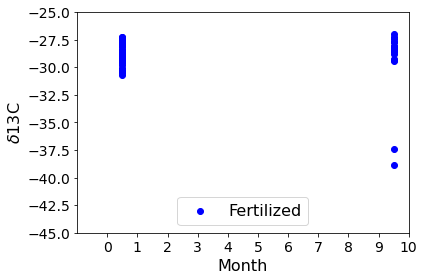

<Figure size 432x288 with 0 Axes>

In [43]:
#Scatter plot no curves

fad13C_scatternocurves = plt.figure()

plt.scatter(*zip(*fad13C_month0_5_A),color='blue',label='Fertilized')
plt.scatter(*zip(*fad13C_month9_5_B),color='blue')

plt.xlabel('Month',fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C',fontsize=16)
plt.xlim((-1,10))
plt.ylim((-45.0,-25.0))
plt.legend(prop={'size': 16},loc='lower center')

plt.xticks(size=14)
plt.yticks(size=14)

fad13C_scatternocurves = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fad13C_scatternocurves.savefig("fad13C_scatternocurves.png",dpi=100)

In [44]:
#Get all orders
 
vec_uad13C_2013 = np.concatenate([all_uad13C_2013[0],all_uad13C_2013[1],all_uad13C_2013[2],all_uad13C_2013[3],all_uad13C_2013[4]])

In [45]:
#Part A: Month 0 to 0.5                             

uad13C_month0_5_A = np.empty((len(vec_uad13C_2013),2), float)         
for i in range(len(vec_uad13C_2013)):
    uad13C_month0_5_A[i,0] = 0.5
    uad13C_month0_5_A[i,1] = vec_uad13C_2013[i]

In [46]:
#Get all orders
 
vec_uad13C_2014 = np.concatenate([all_uad13C_2014[0],all_uad13C_2014[1],all_uad13C_2014[2],all_uad13C_2014[3],all_uad13C_2014[4]])

In [47]:
#Part B: Month 0 to 9.5

uad13C_month9_5_B = np.empty((len(vec_uad13C_2014),2), float)       
for i in range(len(vec_uad13C_2014)):
    uad13C_month9_5_B[i,0] = 9.5
    uad13C_month9_5_B[i,1] = vec_uad13C_2014[i]

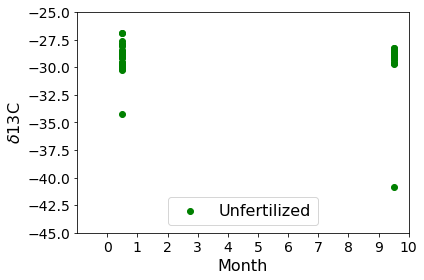

<Figure size 432x288 with 0 Axes>

In [48]:
#Scatter plot no curves

uad13C_scatternocurves = plt.figure()

plt.scatter(*zip(*uad13C_month0_5_A),color='green',label='Unfertilized')
plt.scatter(*zip(*uad13C_month9_5_B),color='green')

plt.xlabel('Month',fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C',fontsize=16)
plt.xlim((-1,10))
plt.ylim((-45.0,-25.0))
plt.legend(prop={'size': 16},loc='lower center')

plt.xticks(size=14)
plt.yticks(size=14)

uad13C_scatternocurves = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
uad13C_scatternocurves.savefig("uad13C_scatternocurves.png",dpi=100)

## Scatter Plot No Curves: Elevated

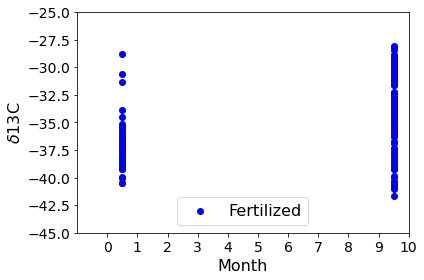

<Figure size 432x288 with 0 Axes>

In [49]:
#Scatter plot no curves

fed13C_scatternocurves = plt.figure()

plt.scatter(*zip(*fed13C_month0_5_A),color='blue',label='Fertilized')
plt.scatter(*zip(*fed13C_month9_5_B),color='blue')

plt.xlabel('Month',fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C',fontsize=16)
plt.xlim((-1,10))
plt.ylim((-45.0,-25.0))
plt.legend(prop={'size': 16},loc='lower center')

plt.xticks(size=14)
plt.yticks(size=14)

fed13C_scatternocurves = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fed13C_scatternocurves.savefig("fed13C_scatternocurves.png",dpi=100)

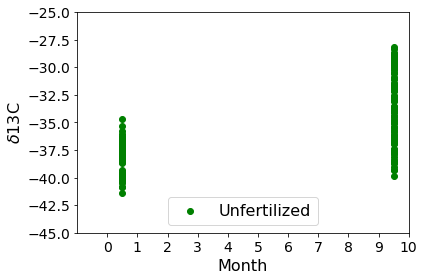

<Figure size 432x288 with 0 Axes>

In [50]:
#Scatter plot no curves

ued13C_scatternocurves = plt.figure()

plt.scatter(*zip(*ued13C_month0_5_A),color='green',label='Unfertilized')
plt.scatter(*zip(*ued13C_month9_5_B),color='green')

plt.xlabel('Month',fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C',fontsize=16)
plt.xlim((-1,10))
plt.ylim((-45.0,-25.0))
plt.legend(prop={'size': 16},loc='lower center')

plt.xticks(size=14)
plt.yticks(size=14)

ued13C_scatternocurves = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
ued13C_scatternocurves.savefig("ued13C_scatternocurves.png",dpi=100)

# 2. LINEAR REGRESSION: CURVE EXPONENTS (DECAY RATES) VS. ROOT DIAMETER
    
$$$$

## Part A: Unfertilized

In [51]:
#Extract indeces

ued13C_order1_2013_inds = df["d13C"][order1_121].index
ued13C_order2_2013_inds = df["d13C"][order2_121].index
ued13C_order3_2013_inds = df["d13C"][order3_121].index
ued13C_order4_2013_inds = df["d13C"][order4_121].index
ued13C_order5_2013_inds = df["d13C"][order5_121].index

#Make arrays of AvgDiam.mm values

diams1 = []
for i in range(len(ued13C_order1_2013_inds)):
    diams1 = np.append(diams1, df["AvgDiam.mm"][ued13C_order1_2013_inds[i]])

diams2 = []
for i in range(len(ued13C_order2_2013_inds)):
    diams2 = np.append(diams2, df["AvgDiam.mm"][ued13C_order2_2013_inds[i]])

diams3 = []
for i in range(len(ued13C_order3_2013_inds)):
    diams3 = np.append(diams3, df["AvgDiam.mm"][ued13C_order3_2013_inds[i]])

diams4 = []
for i in range(len(ued13C_order4_2013_inds)):
    diams4 = np.append(diams4, df["AvgDiam.mm"][ued13C_order4_2013_inds[i]])

diams5 = []
for i in range(len(ued13C_order5_2013_inds)):
    diams5 = np.append(diams5, df["AvgDiam.mm"][ued13C_order5_2013_inds[i]])
    
diams_ue_A = np.concatenate([diams1,diams2,diams3,diams4,diams5])

#Check lengths

print(len(diams_ue_A))
print(len(ks_ue_A))

55
55


In [52]:
#OLS regression
#Source https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/

ks_ue_A = np.absolute(ks_ue_A)

ks_ue_A_ols = ks_ue_A.tolist()                                   #OLS process needs lists instead of arrays         
diams_ue_A_ols = diams_ue_A.tolist()                            

diams_ue_A_ols = sm.add_constant(diams_ue_A_ols)                 #add + b to the model y = mx

results_ue_A = sm.OLS(ks_ue_A_ols, diams_ue_A_ols).fit()

print(results_ue_A.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7782
Date:                Mon, 06 Mar 2023   Prob (F-statistic):              0.382
Time:                        20:30:39   Log-Likelihood:                -6.9879
No. Observations:                  55   AIC:                             17.98
Df Residuals:                      53   BIC:                             21.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7838      0.102      7.681      0.0

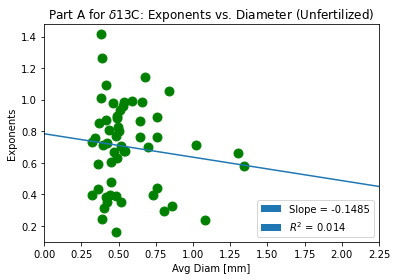

<Figure size 432x288 with 0 Axes>

In [53]:
#Plot

ued13C_kvsdiam_partAfig = plt.figure()

import matplotlib.patches as mpatches                                         #include more content in legend

plt.scatter(diams_ue_A, ks_ue_A,s=80,c='green')
plt.title('Part A for $\delta$13C: Exponents vs. Diameter (Unfertilized)')
plt.xlabel('Avg Diam [mm]')
plt.ylabel('Exponents')
plt.xlim((0,2.25))

#Line of best fit

diams_ue_A_ols_line = np.linspace(0,2.25,100,endpoint=True)                   
ks_ue_A_ols_line = -0.1485*diams_ue_A_ols_line + 0.7838                       #use values from OLS results (x1 and const)

plt.plot(diams_ue_A_ols_line, ks_ue_A_ols_line)

#Legend

slope_ue_A = mpatches.Patch(label='Slope = -0.1485')                          #value from OLS results
Rsq_ue_A = mpatches.Patch(label='$R^2$ = 0.014')                              #value from OLS results

plt.legend(handles=[slope_ue_A, Rsq_ue_A], loc='lower right')

ued13C_kvsdiam_partAfig = plt.gcf()
plt.show()
plt.draw()
ued13C_kvsdiam_partAfig.savefig("ued13C_kvsdiam_partAfig.png",dpi=100)

## Part B: Unfertilized

In [54]:
#Extract indeces

ued13C_order1_2014_inds = df["d13C"][order1_221].index
ued13C_order2_2014_inds = df["d13C"][order2_221].index
ued13C_order3_2014_inds = df["d13C"][order3_221].index
ued13C_order4_2014_inds = df["d13C"][order4_221].index
ued13C_order5_2014_inds = df["d13C"][order5_221].index

#Make arrays of AvgDiam.mm values

diams6 = []                                                                         
for i in range(len(ued13C_order1_2014_inds)):
    diams6 = np.append(diams6, df["AvgDiam.mm"][ued13C_order1_2014_inds[i]])

diams7 = []                                                                         
for i in range(len(ued13C_order2_2014_inds)):
    diams7 = np.append(diams7, df["AvgDiam.mm"][ued13C_order2_2014_inds[i]])

diams8 = []                                                                         
for i in range(len(ued13C_order3_2014_inds)):
    diams8 = np.append(diams8, df["AvgDiam.mm"][ued13C_order3_2014_inds[i]])

diams9 = []                                                                         
for i in range(len(ued13C_order4_2014_inds)):
    diams9 = np.append(diams9, df["AvgDiam.mm"][ued13C_order4_2014_inds[i]])

diams10 = []                                                                        
for i in range(len(ued13C_order5_2014_inds)):
    diams10 = np.append(diams10, df["AvgDiam.mm"][ued13C_order5_2014_inds[i]])
    
diams_ue_B = np.concatenate([diams6,diams7,diams8,diams9,diams10])

#Check lengths

print(len(diams_ue_B))
print(len(ks_ue_B))

113
113


In [55]:
#OLS regression

ks_ue_B = np.absolute(ks_ue_B)

ks_ue_B_ols = ks_ue_B.tolist()
diams_ue_B_ols = diams_ue_B.tolist()

diams_ue_B_ols = sm.add_constant(diams_ue_B_ols)

results_ue_B = sm.OLS(ks_ue_B_ols, diams_ue_B_ols).fit()

print(results_ue_B.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.3520
Date:                Mon, 06 Mar 2023   Prob (F-statistic):              0.554
Time:                        20:30:39   Log-Likelihood:                 148.86
No. Observations:                 113   AIC:                            -293.7
Df Residuals:                     111   BIC:                            -288.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1063      0.019      5.573      0.0

No handles with labels found to put in legend.


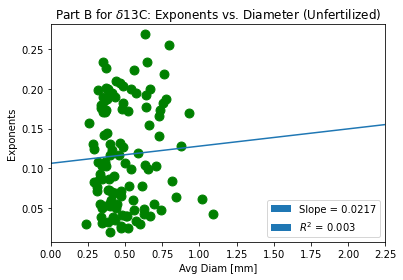

<Figure size 432x288 with 0 Axes>

In [56]:
#Plot

ued13C_kvsdiam_partBfig = plt.figure()

plt.scatter(diams_ue_B, ks_ue_B,s=80,c='green')
plt.title('Part B for $\delta$13C: Exponents vs. Diameter (Unfertilized)')
plt.xlabel('Avg Diam [mm]')
plt.ylabel('Exponents')
plt.xlim((0,2.25))
plt.legend()

#Line of best fit

diams_ue_B_ols_line = np.linspace(0,2.25,100,endpoint=True)
ks_ue_B_ols_line = 0.0217*diams_ue_B_ols_line + 0.1063

plt.plot(diams_ue_B_ols_line, ks_ue_B_ols_line)

#Legend

slope_ue_B = mpatches.Patch(label='Slope = 0.0217')
Rsq_ue_B = mpatches.Patch(label='$R^2$ = 0.003')

plt.legend(handles=[slope_ue_B, Rsq_ue_B], loc='lower right')

ued13C_kvsdiam_partBfig = plt.gcf()
plt.show()
plt.draw()
ued13C_kvsdiam_partBfig.savefig("ued13C_kvsdiam_partBfig.png",dpi=100)

## Part A: Fertilized

In [57]:
#Extract indeces

fed13C_order1_2013_inds = df["d13C"][order1_122].index
fed13C_order2_2013_inds = df["d13C"][order2_122].index
fed13C_order3_2013_inds = df["d13C"][order3_122].index
fed13C_order4_2013_inds = df["d13C"][order4_122].index
fed13C_order5_2013_inds = df["d13C"][order5_122].index

#Make arrays of AvgDiam.mm values

diams11 = []                                                                      
for i in range(len(fed13C_order1_2013_inds)):
    diams11 = np.append(diams11, df["AvgDiam.mm"][fed13C_order1_2013_inds[i]])

diams12 = []                                                                       
for i in range(len(fed13C_order2_2013_inds)):
    diams12 = np.append(diams12, df["AvgDiam.mm"][fed13C_order2_2013_inds[i]])

diams13 = []                                                                      
for i in range(len(fed13C_order3_2013_inds)):
    diams13 = np.append(diams13, df["AvgDiam.mm"][fed13C_order3_2013_inds[i]])

diams14 = []                                                                       
for i in range(len(fed13C_order4_2013_inds)):
    diams14 = np.append(diams14, df["AvgDiam.mm"][fed13C_order4_2013_inds[i]])

diams15 = []                                                                       
for i in range(len(fed13C_order5_2013_inds)):
    diams15 = np.append(diams15, df["AvgDiam.mm"][fed13C_order5_2013_inds[i]])
    
diams_fe_A = np.concatenate([diams11,diams12,diams13,diams14,diams15])

#Check lengths

print(len(diams_fe_A))
print(len(ks_fe_A))

54
54


In [58]:
#OLS regression

ks_fe_A = np.absolute(ks_fe_A)

ks_fe_A_ols = ks_fe_A.tolist()
diams_fe_A_ols = diams_fe_A.tolist()

diams_fe_A_ols = sm.add_constant(diams_fe_A_ols)

results_fe_A = sm.OLS(ks_fe_A_ols, diams_fe_A_ols).fit()

print(results_fe_A.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.2905
Date:                Mon, 06 Mar 2023   Prob (F-statistic):              0.592
Time:                        20:30:40   Log-Likelihood:                -52.722
No. Observations:                  54   AIC:                             109.4
Df Residuals:                      52   BIC:                             113.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0337      0.190      5.438      0.0

No handles with labels found to put in legend.


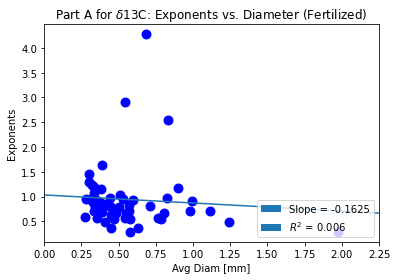

<Figure size 432x288 with 0 Axes>

In [59]:
#Plot

fed13C_kvsdiam_partAfig = plt.figure()

plt.scatter(diams_fe_A, ks_fe_A,s=80,c='blue')
plt.title('Part A for $\delta$13C: Exponents vs. Diameter (Fertilized)')
plt.xlabel('Avg Diam [mm]')
plt.ylabel('Exponents')
plt.xlim((0,2.25))
plt.legend(loc='lower right')

#Line of best fit

diams_fe_A_ols_line = np.linspace(0,2.25,100,endpoint=True)
ks_fe_A_ols_line = -0.1625*diams_fe_A_ols_line + 1.0337

plt.plot(diams_fe_A_ols_line, ks_fe_A_ols_line)

#Legend

slope_fe_A = mpatches.Patch(label='Slope = -0.1625')
Rsq_fe_A = mpatches.Patch(label='$R^2$ = 0.006')

plt.legend(handles=[slope_fe_A, Rsq_fe_A], loc='lower right')

fed13C_kvsdiam_partAfig = plt.gcf()
plt.show()
plt.draw()
fed13C_kvsdiam_partAfig.savefig("fed13C_kvsdiam_partAfig.png",dpi=100)

#One outlier: value is about -4.5

## Part B: Fertilized

In [60]:
#Extract indeces

fed13C_order1_2014_inds = df["d13C"][order1_222].index
fed13C_order2_2014_inds = df["d13C"][order2_222].index
fed13C_order3_2014_inds = df["d13C"][order3_222].index
fed13C_order4_2014_inds = df["d13C"][order4_222].index
fed13C_order5_2014_inds = df["d13C"][order5_222].index

#Make arrays of AvgDiam.mm values

diams16 = []                                                                     
for i in range(len(fed13C_order1_2014_inds)):
    diams16 = np.append(diams16, df["AvgDiam.mm"][fed13C_order1_2014_inds[i]])

diams17 = []                                                                     
for i in range(len(fed13C_order2_2014_inds)):
    diams17 = np.append(diams17, df["AvgDiam.mm"][fed13C_order2_2014_inds[i]])

diams18 = []                                                                    
for i in range(len(fed13C_order3_2014_inds)):
    diams18 = np.append(diams18, df["AvgDiam.mm"][fed13C_order3_2014_inds[i]])

diams19 = []                                                                    
for i in range(len(fed13C_order4_2014_inds)):
    diams19 = np.append(diams19, df["AvgDiam.mm"][fed13C_order4_2014_inds[i]])

diams20 = []                                                                    
for i in range(len(fed13C_order5_2014_inds)):
    diams20 = np.append(diams20, df["AvgDiam.mm"][fed13C_order5_2014_inds[i]])
    
diams_fe_B = np.concatenate([diams16,diams17,diams18,diams19,diams20])

#Check lengths

print(len(diams_fe_B))
print(len(ks_fe_B))

123
123


In [61]:
#OLS regression

ks_fe_B = np.absolute(ks_fe_B)

ks_fe_B_ols = ks_fe_B.tolist()
diams_fe_B_ols = diams_fe_B.tolist()

diams_fe_B_ols = sm.add_constant(diams_fe_B_ols)

results_fe_B = sm.OLS(ks_fe_B_ols, diams_fe_B_ols).fit()

print(results_fe_B.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.439
Date:                Mon, 06 Mar 2023   Prob (F-statistic):             0.0661
Time:                        20:30:41   Log-Likelihood:                 165.93
No. Observations:                 123   AIC:                            -327.9
Df Residuals:                     121   BIC:                            -322.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1286      0.013      9.842      0.0

No handles with labels found to put in legend.


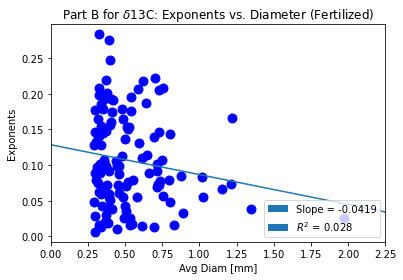

<Figure size 432x288 with 0 Axes>

In [62]:
#Plot

fed13C_kvsdiam_partBfig = plt.figure()

plt.scatter(diams_fe_B, ks_fe_B,s=80,c='blue')
plt.title('Part B for $\delta$13C: Exponents vs. Diameter (Fertilized)')
plt.xlabel('Avg Diam [mm]')
plt.ylabel('Exponents')
plt.xlim((0,2.25))
plt.legend(loc='lower right')

#Line of best fit

diams_fe_B_ols_line = np.linspace(0,2.25,100,endpoint=True)
ks_fe_B_ols_line = -0.0419*diams_fe_B_ols_line + 0.1286

plt.plot(diams_fe_B_ols_line, ks_fe_B_ols_line)

#Legend

slope_fe_B = mpatches.Patch(label='Slope = -0.0419')
Rsq_fe_B = mpatches.Patch(label='$R^2$ = 0.028')

plt.legend(handles=[slope_fe_B, Rsq_fe_B], loc='lower right')

fed13C_kvsdiam_partBfig = plt.gcf()
plt.show()
plt.draw()
fed13C_kvsdiam_partBfig.savefig("fed13C_kvsdiam_partBfig.png",dpi=100)

## Part A: Both

In [63]:
#Make array of AvgDiam.mm values

diams_bothe_A = np.concatenate([diams_ue_A,diams_fe_A])

In [64]:
#RLM regression redone instead of OLS

ks_bothe_A = np.absolute(ks_bothe_A)

ks_bothe_A_rlm = ks_bothe_A.tolist()                                            
diams_bothe_A_rlm = diams_bothe_A.tolist()                            

diams_bothe_A_rlm = sm.add_constant(diams_bothe_A_rlm)                 

results_bothe_A = sm.RLM(ks_bothe_A_rlm, diams_bothe_A_rlm, M=sm.robust.norms.HuberT())
rlm_results_bothe_A = results_bothe_A.fit()

print(rlm_results_bothe_A.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 06 Mar 2023                                         
Time:                        20:30:41                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8995      0.072     12.468      0.0

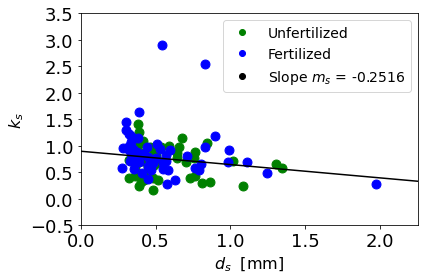

<Figure size 432x288 with 0 Axes>

In [65]:
#Plot

bothed13C_kvsdiam_partAfig = plt.figure()

plt.scatter(diams_ue_A, ks_ue_A,s=80,c='green')
plt.scatter(diams_fe_A, ks_fe_A,s=80,c='blue')
plt.xlabel('$d_s \;$ [mm]',fontsize=16)
plt.ylabel('$k_s$',fontsize=16)
plt.xlim((0,2.25))
plt.ylim((-3.5,0.5))
plt.ylim((-0.5,3.5))

plt.xticks(size=18)
plt.xticks([0,0.5,1,1.5,2])
plt.yticks(size=18)

#Line of best fit

diams_bothe_A_rlm_line = np.linspace(0,2.25,100,endpoint=True)                   
ks_bothe_A_rlm_line = -0.2516*diams_bothe_A_rlm_line + 0.8995                        

plt.plot(diams_bothe_A_rlm_line, ks_bothe_A_rlm_line, c='black')

#Legend

import matplotlib.lines as mlines

label1 = mlines.Line2D([], [], label='Unfertilized', color='green', marker='o', ls='')
label2 = mlines.Line2D([], [], label='Fertilized', color='blue', marker='o', ls='')
label3 = mlines.Line2D([], [], label='Slope $m_s$ = -0.2516', color='black', marker='o', ls='')

plt.legend(handles=[label1,label2,label3],loc='upper right',prop={'size': 14})

bothed13C_kvsdiam_partAfig = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
bothed13C_kvsdiam_partAfig.savefig("bothed13C_kvsdiam_partAfig.png",dpi=100)

## Part B: Both

In [66]:
#Make array of AvgDiam.mm values

diams_bothe_B = np.concatenate([diams_ue_B,diams_fe_B])

In [67]:
#RLM regression

ks_bothe_B = np.absolute(ks_bothe_B)

ks_bothe_B_rlm = ks_bothe_B.tolist()                                            
diams_bothe_B_rlm = diams_bothe_B.tolist()                            

diams_bothe_B_rlm = sm.add_constant(diams_bothe_B_rlm)                 

results_bothe_B = sm.RLM(ks_bothe_B_rlm, diams_bothe_B_rlm, M=sm.robust.norms.HuberT())
rlm_results_bothe_B = results_bothe_B.fit()

print(rlm_results_bothe_B.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  236
Model:                            RLM   Df Residuals:                      234
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 06 Mar 2023                                         
Time:                        20:30:42                                         
No. Iterations:                    10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1231      0.011     11.337      0.0

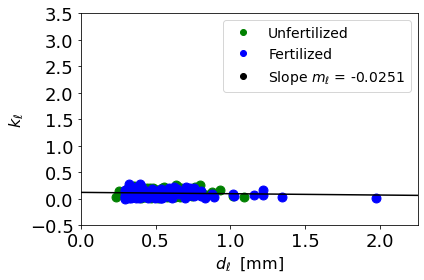

<Figure size 432x288 with 0 Axes>

In [68]:
#Plot

bothed13C_kvsdiam_partBfig = plt.figure()

plt.scatter(diams_ue_B, ks_ue_B,s=80,c='green')
plt.scatter(diams_fe_B, ks_fe_B,s=80,c='blue')
plt.xlabel('$d_{\ell} \;$ [mm]',fontsize=16)
plt.ylabel('$k_{\ell}}$',fontsize=16)
plt.xlim((0,2.25))
plt.ylim((-0.5,3.5))

plt.xticks(size=18)
plt.xticks([0,0.5,1,1.5,2])
plt.yticks(size=18)

#Line of best fit

diams_bothe_B_rlm_line = np.linspace(0,2.25,100,endpoint=True)                   
ks_bothe_B_rlm_line = -0.0251*diams_bothe_B_rlm_line + 0.1231 

plt.plot(diams_bothe_B_rlm_line, ks_bothe_B_rlm_line, c='black')

#Legend

label5 = mlines.Line2D([], [], label='Unfertilized', color='green', marker='o', ls='')
label6 = mlines.Line2D([], [], label='Fertilized', color='blue', marker='o', ls='')
label7 = mlines.Line2D([], [], label='Slope $m_{\ell}$ = -0.0251', color='black', marker='o', ls='')

plt.legend(handles=[label5,label6,label7],loc='upper right',prop={'size': 14})

bothed13C_kvsdiam_partBfig = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
bothed13C_kvsdiam_partBfig.savefig("bothed13C_kvsdiam_partBfig.png",dpi=100)

# 2.1) DECAY RATE DISTRIBUTIONS

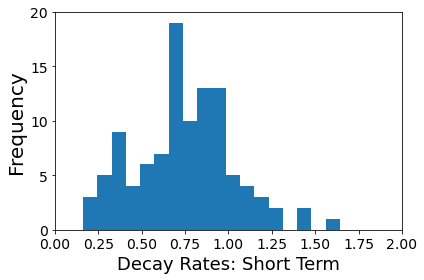

<Figure size 432x288 with 0 Axes>

In [69]:
hist_A = plt.figure()

plt.hist(ks_bothe_A,bins=50)
plt.xlabel('Decay Rates: Short Term',fontsize=18)
plt.ylabel('Frequency',fontsize=20)
plt.xlim(0,2)
plt.ylim(0,20)
plt.yticks([0,5,10,15,20])

plt.xticks(size=14)
plt.yticks(size=14)

hist_A = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
hist_A.savefig("hist_A_fig",dpi=100)

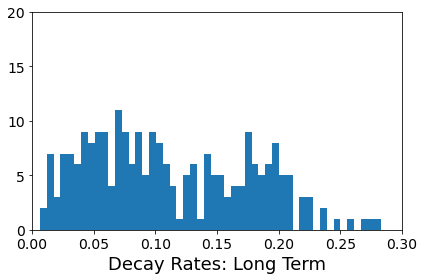

<Figure size 432x288 with 0 Axes>

In [70]:
hist_B = plt.figure()

plt.hist(ks_bothe_B,bins=50)
plt.xlabel('Decay Rates: Long Term',fontsize=18)
plt.xlim(0,0.3)
plt.ylim(0,20)
plt.yticks([0,5,10,15,20])

plt.xticks(size=14)
plt.yticks(size=14)

hist_B = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
hist_B.savefig("hist_B_fig",dpi=100)

# 2.2) BOX PLOTS

0.8205876256817485
0.82


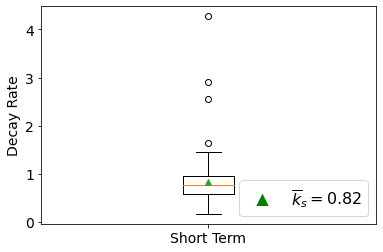

<Figure size 432x288 with 0 Axes>

In [71]:
#Source https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html

boxplot_A = plt.figure()

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

bp1 = plt.boxplot(ks_bothe_A,showmeans=True)

plt.xticks([1],['Short Term'],fontsize=14)
plt.ylabel('Decay Rate',fontsize=14)

plt.xticks(size=14)
plt.yticks(size=14)

bp1mean = np.average(ks_bothe_A)
print(bp1mean)
bp1mean = np.around(bp1mean,2)
print(bp1mean)

legend_elements = [Line2D([0],[0],marker='^',color='w',label='$\overline{k}_s = 0.82$',markerfacecolor='g', markersize=14)]
plt.legend(handles=legend_elements,loc='lower right',fontsize=16)

boxplot_A = plt.gcf()
plt.show()
plt.draw()
boxplot_A.savefig("boxplot_A_fig",dpi=100)

0.11166002737554451
0.11


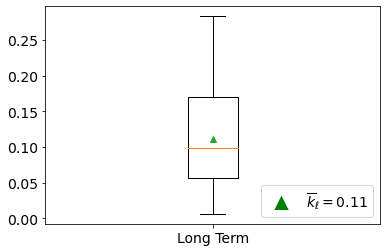

<Figure size 432x288 with 0 Axes>

In [72]:
boxplot_B = plt.figure()

bp2 = plt.boxplot(ks_bothe_B,showmeans=True)

plt.xticks([1],['Long Term'],fontsize=14)

plt.xticks(size=14)
plt.yticks(size=14)

bp2mean = np.average(ks_bothe_B)
print(bp2mean)
bp2mean = np.around(bp2mean,2)
print(bp2mean)

legend_elements = [Line2D([0],[0],marker='^',color='w',label='$\overline{k}_{\ell} = 0.11$',markerfacecolor='g', markersize=16)]

plt.legend(handles=legend_elements,loc='lower right',fontsize=14)

boxplot_B = plt.gcf()
plt.show()
plt.draw()
boxplot_B.savefig("boxplot_B_fig",dpi=100)

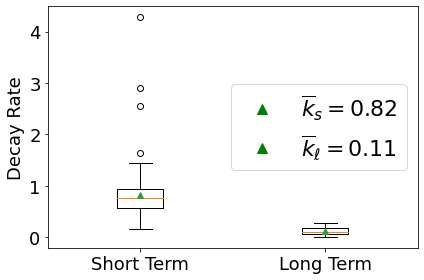

<Figure size 432x288 with 0 Axes>

In [73]:
#Source https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

boxplot_both = plt.figure()

ks_bothe = [ks_bothe_A, ks_bothe_B]

boxplot_both = plt.boxplot(ks_bothe,showmeans=True,widths=(0.25, 0.25))

plt.xticks([1,2],['Short Term','Long Term'],fontsize=22)
plt.ylabel('Decay Rate',fontsize=18)

plt.xticks(size=18)
plt.yticks(size=18)

legend_elements_A = mlines.Line2D([], [], label='$\overline{k}_s = 0.82$', color='green', marker='^', markersize = 10, ls='')
legend_elements_B = mlines.Line2D([], [], label='$\overline{k}_{\ell} = 0.11$', color='green', marker='^', markersize = 10, ls='')

plt.legend(handles=[legend_elements_A,legend_elements_B],loc='center right',prop={'size': 22})

boxplot_both = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
boxplot_both.savefig("boxplot_both_fig",dpi=100)

# 2.3) VIOLIN PLOTS

$$$$    
    
## Part A: Unfertilized

In [74]:
#Make arrays of exponents by order

#Order 1 exponents

start1 = 0
stop1 = len(all_ued13C_2013[0])

ks_ue_A_order1 = []
for i in range(start1,stop1):
    ks_ue_A_order1 = np.append(ks_ue_A_order1, ks_ue_A[i])

#Order 2 exponents

start2 = stop1
stop2 = start2 + len(all_ued13C_2013[1])

ks_ue_A_order2 = []
for i in range(start2,stop2):
    ks_ue_A_order2 = np.append(ks_ue_A_order2, ks_ue_A[i])

#Order 3 exponents

start3 = stop2
stop3 = start3 + len(all_ued13C_2013[2])

ks_ue_A_order3 = []
for i in range(start3,stop3):
    ks_ue_A_order3 = np.append(ks_ue_A_order3, ks_ue_A[i])

#Order 4 exponents

start4 = stop3
stop4 = start4 + len(all_ued13C_2013[3])

ks_ue_A_order4 = []
for i in range(start4,stop4):
    ks_ue_A_order4 = np.append(ks_ue_A_order4, ks_ue_A[i])

#Order 5 exponents

start5 = stop4
stop5 = start5 + len(all_ued13C_2013[4])

ks_ue_A_order5 = []
for i in range(start5,stop5):
    ks_ue_A_order5 = np.append(ks_ue_A_order5, ks_ue_A[i])
    
#Make one array with five inner arrays

ks_ue_A_allorders = [ks_ue_A_order1, ks_ue_A_order2, ks_ue_A_order3, ks_ue_A_order4, ks_ue_A_order5]

#Check lengths

print(len(ks_ue_A_order1) + len(ks_ue_A_order2) + len(ks_ue_A_order3) + len(ks_ue_A_order4) + len(ks_ue_A_order5))
print(len(ks_ue_A))

55
55


<Figure size 432x288 with 0 Axes>

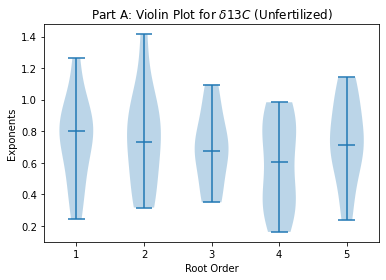

<Figure size 432x288 with 0 Axes>

In [75]:
#Violin plot

ued13C_violin_partAfig = plt.figure()

fig, ax = plt.subplots()                                                #fig not used: included as a formality
ax.violinplot(ks_ue_A_allorders, showmedians=True)                      #the five inner arrays are the input for violinplot()
ax.set_title('Part A: Violin Plot for $\delta13C$ (Unfertilized)')
ax.set_xlabel('Root Order')
ax.set_ylabel('Exponents')                                            

ued13C_violin_partAfig = plt.gcf()
plt.show()
plt.draw()
ued13C_violin_partAfig.savefig("ued13C_violin_partAfig.png",dpi=100)

## Part B: Unfertilized

In [76]:
#Make arrays of exponents by order

#Order 1 exponents

start1 = 0
stop1 = len(all_ued13C_2014[0])

ks_ue_B_order1 = []
for i in range(start1,stop1):
    ks_ue_B_order1 = np.append(ks_ue_B_order1, ks_ue_B[i])
    
#Order 2 exponents

start2 = stop1
stop2 = start2 + len(all_ued13C_2014[1])

ks_ue_B_order2 = []
for i in range(start2,stop2):
    ks_ue_B_order2 = np.append(ks_ue_B_order2, ks_ue_B[i])
    
#Order 3 exponents

start3 = stop2
stop3 = start3 + len(all_ued13C_2014[2])

ks_ue_B_order3 = []
for i in range(start3,stop3):
    ks_ue_B_order3 = np.append(ks_ue_B_order3, ks_ue_B[i])
    
#Order 4 exponents

start4 = stop3
stop4 = start4 + len(all_ued13C_2014[3])

ks_ue_B_order4 = []
for i in range(start4,stop4):
    ks_ue_B_order4 = np.append(ks_ue_B_order4, ks_ue_B[i])
    
#Order 5 exponents

start5 = stop4
stop5 = start5 + len(all_ued13C_2014[4])

ks_ue_B_order5 = []
for i in range(start5,stop5):
    ks_ue_B_order5 = np.append(ks_ue_B_order5, ks_ue_B[i])
    
#Make one array with five inner arrays

ks_ue_B_allorders = [ks_ue_B_order1, ks_ue_B_order2, ks_ue_B_order3, ks_ue_B_order4, ks_ue_B_order5]

#Check lengths

print(len(ks_ue_B_order1) + len(ks_ue_B_order2) + len(ks_ue_B_order3) + len(ks_ue_B_order4) + len(ks_ue_B_order5))
print(len(ks_ue_B))

113
113


<Figure size 432x288 with 0 Axes>

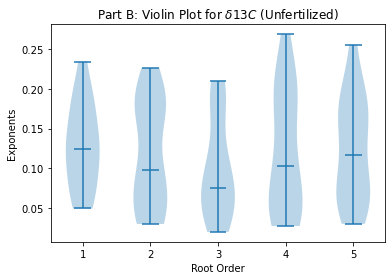

<Figure size 432x288 with 0 Axes>

In [77]:
#Violin plot

ued13C_violin_partBfig = plt.figure()

fig, ax = plt.subplots()
ax.violinplot(ks_ue_B_allorders, showmedians=True)
ax.set_title('Part B: Violin Plot for $\delta13C$ (Unfertilized)')
ax.set_xlabel('Root Order')
ax.set_ylabel('Exponents')

ued13C_violin_partBfig = plt.gcf()
plt.show()
plt.draw()
ued13C_violin_partBfig.savefig("ued13C_violin_partBfig.png",dpi=100)

## Part A: Fertilized

In [78]:
#Make arrays of exponents by order

#Order 1 exponents

start1 = 0
stop1 = len(all_fed13C_2013[0])

ks_fe_A_order1 = []
for i in range(start1,stop1):
    ks_fe_A_order1 = np.append(ks_fe_A_order1, ks_fe_A[i])
    
#Order 2 exponents

start2 = stop1
stop2 = start2 + len(all_fed13C_2013[1])

ks_fe_A_order2 = []
for i in range(start2,stop2):
    ks_fe_A_order2 = np.append(ks_fe_A_order2, ks_fe_A[i])
    
#Order 3 exponents

start3 = stop2
stop3 = start3 + len(all_fed13C_2013[2])

ks_fe_A_order3 = []
for i in range(start3,stop3):
    ks_fe_A_order3 = np.append(ks_fe_A_order3, ks_fe_A[i])
    
#Order 4 exponents

start4 = stop3
stop4 = start4 + len(all_fed13C_2013[3])

ks_fe_A_order4 = []
for i in range(start4,stop4):
    ks_fe_A_order4 = np.append(ks_fe_A_order4, ks_fe_A[i])
    
#Order 5 exponents

start5 = stop4
stop5 = start5 + len(all_fed13C_2013[4])

ks_fe_A_order5 = []
for i in range(start5,stop5):
    ks_fe_A_order5 = np.append(ks_fe_A_order5, ks_fe_A[i])
    
#Make one array with five inner arrays

ks_fe_A_allorders = [ks_fe_A_order1, ks_fe_A_order2, ks_fe_A_order3, ks_fe_A_order4, ks_fe_A_order5]

#Check lengths

print(len(ks_fe_A_order1) + len(ks_fe_A_order2) + len(ks_fe_A_order3) + len(ks_fe_A_order4) + len(ks_fe_A_order5))
print(len(ks_fe_A))

54
54


<Figure size 432x288 with 0 Axes>

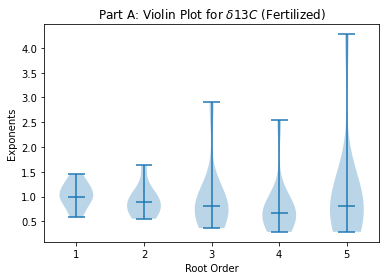

<Figure size 432x288 with 0 Axes>

In [79]:
#Violin plot

fed13C_violin_partAfig = plt.figure()

fig, ax = plt.subplots()
ax.violinplot(ks_fe_A_allorders, showmedians=True)
ax.set_title('Part A: Violin Plot for $\delta13C$ (Fertilized)')
ax.set_xlabel('Root Order')
ax.set_ylabel('Exponents')

fed13C_violin_partAfig = plt.gcf()
plt.show()
plt.draw()
fed13C_violin_partAfig.savefig("fed13C_violin_partAfig.png",dpi=100)

## Part B: Fertilized

In [80]:
#Make arrays of exponents by order

#Order 1 exponents

start1 = 0
stop1 = len(all_fed13C_2014[0])

ks_fe_B_order1 = []
for i in range(start1,stop1):
    ks_fe_B_order1 = np.append(ks_fe_B_order1, ks_fe_B[i])
    
#Order 2 exponents

start2 = stop1
stop2 = start2 + len(all_fed13C_2014[1])

ks_fe_B_order2 = []
for i in range(start2,stop2):
    ks_fe_B_order2 = np.append(ks_fe_B_order2, ks_fe_B[i])
    
#Order 3 exponents

start3 = stop2
stop3 = start3 + len(all_fed13C_2014[2])

ks_fe_B_order3 = []
for i in range(start3,stop3):
    ks_fe_B_order3 = np.append(ks_fe_B_order3, ks_fe_B[i])
    
#Order 4 exponents

start4 = stop3
stop4 = start4 + len(all_fed13C_2014[3])

ks_fe_B_order4 = []
for i in range(start4,stop4):
    ks_fe_B_order4 = np.append(ks_fe_B_order4, ks_fe_B[i])
    
#Order 5 exponents

start5 = stop4
stop5 = start5 + len(all_fed13C_2014[4])

ks_fe_B_order5 = []
for i in range(start5,stop5):
    ks_fe_B_order5 = np.append(ks_fe_B_order5, ks_fe_B[i])
    
#Make one array with five inner arrays

ks_fe_B_allorders = [ks_fe_B_order1, ks_fe_B_order2, ks_fe_B_order3, ks_fe_B_order4, ks_fe_B_order5]

<Figure size 432x288 with 0 Axes>

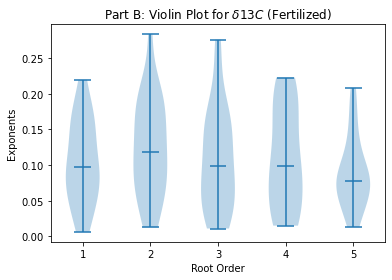

<Figure size 432x288 with 0 Axes>

In [81]:
#Violin plot

fed13C_violin_partBfig = plt.figure()

fig, ax = plt.subplots()
ax.violinplot(ks_fe_B_allorders, showmedians=True)
ax.set_title('Part B: Violin Plot for $\delta13C$ (Fertilized)')
ax.set_xlabel('Root Order')
ax.set_ylabel('Exponents')

fed13C_violin_partBfig = plt.gcf()
plt.show()
plt.draw()
fed13C_violin_partBfig.savefig("fed13C_violin_partBfig.png",dpi=100)

## Part A: Both

In [82]:
#Make ks_bothe_A_allorders (array with 5 inner arrays)

ks_bothe_A_order1 = np.concatenate([ks_ue_A_order1,ks_fe_A_order1])
ks_bothe_A_order2 = np.concatenate([ks_ue_A_order2,ks_fe_A_order2])
ks_bothe_A_order3 = np.concatenate([ks_ue_A_order3,ks_fe_A_order3])
ks_bothe_A_order4 = np.concatenate([ks_ue_A_order4,ks_fe_A_order4])
ks_bothe_A_order5 = np.concatenate([ks_ue_A_order5,ks_fe_A_order5])

ks_bothe_A_allorders = [ks_bothe_A_order1, ks_bothe_A_order2, ks_bothe_A_order3, ks_bothe_A_order4, ks_bothe_A_order5]

<Figure size 432x288 with 0 Axes>

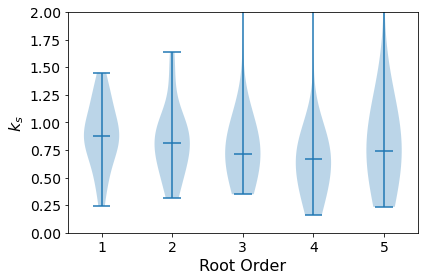

<Figure size 432x288 with 0 Axes>

In [83]:
#Violin plot

bothed13C_violin_partAfig = plt.figure()

fig, ax = plt.subplots()
ax.violinplot(ks_bothe_A_allorders, showmedians=True)
ax.set_xlabel('Root Order',fontsize=16)
ax.set_ylabel('$k_s$',fontsize=16)
ax.set_ylim(-4.5,0)
ax.set_ylim(0,2)

plt.xticks(size=14)
plt.yticks(size=14)

bothed13C_violin_partAfig = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
bothed13C_violin_partAfig.savefig("bothed13C_violin_partAfig.png",dpi=100)

## Part B: Both

In [84]:
#Make ks_bothe_B_allorders (array with 5 inner arrays)

ks_bothe_B_order1 = np.concatenate([ks_ue_B_order1,ks_fe_B_order1])
ks_bothe_B_order2 = np.concatenate([ks_ue_B_order2,ks_fe_B_order2])
ks_bothe_B_order3 = np.concatenate([ks_ue_B_order3,ks_fe_B_order3])
ks_bothe_B_order4 = np.concatenate([ks_ue_B_order4,ks_fe_B_order4])
ks_bothe_B_order5 = np.concatenate([ks_ue_B_order5,ks_fe_B_order5])

ks_bothe_B_allorders = [ks_bothe_B_order1, ks_bothe_B_order2, ks_bothe_B_order3, ks_bothe_B_order4, ks_bothe_B_order5]

<Figure size 432x288 with 0 Axes>

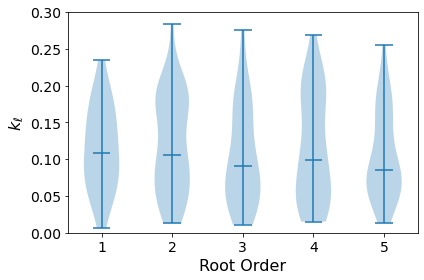

<Figure size 432x288 with 0 Axes>

In [85]:
#Violin plot

bothed13C_violin_partBfig = plt.figure()

fig, ax = plt.subplots()
ax.violinplot(ks_bothe_B_allorders, showmedians=True)
ax.set_xlabel('Root Order',fontsize=16)
ax.set_ylabel('$k_{\ell}$',fontsize=16)
ax.set_ylim(0,0.3)

plt.xticks(size=14)
plt.yticks(size=14)

bothed13C_violin_partBfig = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
bothed13C_violin_partBfig.savefig("bothed13C_violin_partBfig.png",dpi=100)

# 2.4) SHORT-TERM DECAY RATE STATISTICS

In [86]:
#Mean, var, and std dev
#Make new arrays without outliers for orders 3, 4, 5

new_ks_bothe_A_order3 = ks_bothe_A_order3

pos3 = []
for i in range(len(new_ks_bothe_A_order3)):
    if new_ks_bothe_A_order3[i] > 2.0:
        pos3.append(i)
new_ks_bothe_A_order3 = np.delete(new_ks_bothe_A_order3, pos3)

new_ks_bothe_A_order4 = ks_bothe_A_order4

pos4 = []
for i in range(len(new_ks_bothe_A_order4)):
    if new_ks_bothe_A_order4[i] > 2.0:
        pos4.append(i)
new_ks_bothe_A_order4 = np.delete(new_ks_bothe_A_order4, pos4)

new_ks_bothe_A_order5 = ks_bothe_A_order5
    
pos5 = []
for i in range(len(new_ks_bothe_A_order5)):
    if new_ks_bothe_A_order5[i] > 2.0:
        pos5.append(i)
new_ks_bothe_A_order5 = np.delete(new_ks_bothe_A_order5, pos5)

In [87]:
gmean1 = np.mean(ks_bothe_A_order1)
gvar1 = np.var(ks_bothe_A_order1)
gsigma1 = np.sqrt(gvar1)
gSE1 = gsigma1/(np.sqrt(len(ks_bothe_A_order1)))

print(gmean1,gsigma1,gSE1)

0.8841211038188553 0.29205289635290843 0.06226588671617092


In [88]:
gmean2 = np.mean(ks_bothe_A_order2)
gvar2 = np.var(ks_bothe_A_order2)
gsigma2 = np.sqrt(gvar2)
gSE2 = gsigma2/(np.sqrt(len(ks_bothe_A_order2)))

print(gmean2,gsigma2,gSE2)

0.8240464619762332 0.3142745407611798 0.06700355722261402


In [89]:
gmean3 = np.mean(new_ks_bothe_A_order3)
gvar3 = np.var(new_ks_bothe_A_order3)
gsigma3 = np.sqrt(gvar3)
gSE3 = gsigma3/(np.sqrt(len(ks_bothe_A_order3)))

print(gmean3,gsigma3,gSE3)

0.7016439427378147 0.21236033104691565 0.046340823410874844


In [90]:
gmean4 = np.mean(new_ks_bothe_A_order4)
gvar4 = np.var(new_ks_bothe_A_order4)
gsigma4 = np.sqrt(gvar4)
gSE4 = gsigma4/(np.sqrt(len(ks_bothe_A_order4)))

print(gmean4,gsigma4,gSE4)

0.6006428133784205 0.2288807929944573 0.04879754902645848


In [91]:
gmean5 = np.mean(new_ks_bothe_A_order5)
gvar5 = np.var(new_ks_bothe_A_order5)
gsigma5 = np.sqrt(gvar5)
gSE5 = gsigma5/(np.sqrt(len(ks_bothe_A_order5)))

print(gmean5,gsigma5,gSE5)

0.7380164184221855 0.25977494187754396 0.055384203699529434


# 3. ODE MODEL 
    
$$$$

$$\text{System inspired by ICBM and Newton's law of cooling:}$$
    
$$
\begin{align*}
\begin{split}
\frac{dF}{dt} & = I_F - k_1\left(F - F_{\text{eq}}\right) \\
\frac{dS}{dt} & = I_S + hk_1\left(F - F_{\text{eq}}\right) - k_2\left(S - S_{\text{eq}}\right)
\end{split}
\end{align*}
$$

$$$$

$$\text{Solutions} \; (I_F = I_S = 0):$$

$$
\begin{align*}
\begin{split}
F(t) & = \left(\alpha - F_{\text{eq}}\right)e^{-k_1 t} + F_{\text{eq}} \\
S(t) & = \frac{hk_1}{k_2 - k_1}\left(\alpha - F_{\text{eq}}\right)\left(e^{-k_1 t} - e^{-k_2 t}\right) + \left(-42.6 - \alpha - S_{\text{eq}}\right)e^{-k_2 t} + S_{\text{eq}}
\end{split}
\end{align*}
$$

$$$$

$$\text{Initial conditions:}$$

$$F(0) = \alpha \; \; \; \; \; \; \; \; F(0) + S(0) = -42.6 \; \; \; \; \implies \; \; \; \; S(0) = -42.6 - \alpha$$

$$$$

$$\text{Parameters:}$$

$$I_F = I_S = 0 \; \; \; \; \; \; \; \; F_{\text{eq}} + S_{\text{eq}} = -27 \; \; \; \; \implies \; \; \; \; S_{\text{eq}} = -27 - F_{\text{eq}}$$

$$$$

$$\text{Rewrite solution} \; S(t):$$

$$S(t) = \frac{hk_1}{k_2 - k_1}\left(\alpha - F_{\text{eq}}\right)\left(e^{-k_1 t} - e^{-k_2 t}\right) + \left(-42.6 - \alpha + 27 + F_{\text{eq}}\right)e^{-k_2 t} - 27 - F_{\text{eq}}$$

$$S(t) = \frac{hk_1}{k_2 - k_1}\left(\alpha - F_{\text{eq}}\right)\left(e^{-k_1 t} - e^{-k_2 t}\right) + \left(-15.6 - \alpha + F_{\text{eq}} \right)e^{-k_2 t} - 27 - F_{\text{eq}}$$

$$$$

$$\text{3 unknowns:} \; \alpha, h, F_{\text{eq}}$$

$$$$

## Optimization

In [92]:
#Solutions

def F(alpha, Feq, k1, t):
    return (alpha - Feq)*np.exp(-1.0*k1*t) + Feq

def S(alpha, h, Feq, k1, k2, t):
    coeff1 = (h*k1*(alpha - Feq))/(k2 - k1)
    coeff2 = -15.6 - alpha + Feq
    return coeff1*(np.exp(-1.0*k1*t) - np.exp(-1.0*k2*t)) + coeff2*np.exp(-1.0*k2*t) - 27.0 - Feq

def SumFS(alpha, h, Feq, k1, k2, t):
    return F(alpha, Feq, k1, t) + S(alpha, h, Feq, k1, k2, t)

In [93]:
#All d13C values for Part A

bothed13Cvals_month0_5_A = []       #NOT PAIRS OF COORD POINTS (IN CONTRAST TO UED13C_MONTH0_5_A AND FED13C_MONTH0_5_A)
                                          
for i in range(len(ued13C_month0_5_A)):
    bothed13Cvals_month0_5_A = np.append(bothed13Cvals_month0_5_A, ued13C_month0_5_A[i][1])
    
for i in range(len(fed13C_month0_5_A)):
    bothed13Cvals_month0_5_A = np.append(bothed13Cvals_month0_5_A, fed13C_month0_5_A[i][1])
    
#All d13C values for Part B

bothed13Cvals_month9_5_B = []       #NOT PAIRS OF COORD POINTS (IN CONTRAST TO UED13C_MONTH9_5_B AND FED13C_MONTH9_5_B)
                                          
for i in range(len(ued13C_month9_5_B)):
    bothed13Cvals_month9_5_B = np.append(bothed13Cvals_month9_5_B, ued13C_month9_5_B[i][1])
    
for i in range(len(fed13C_month9_5_B)):
    bothed13Cvals_month9_5_B = np.append(bothed13Cvals_month9_5_B, fed13C_month9_5_B[i][1])
    
#Part A and Part B
    
bothed13Cvals = np.concatenate([bothed13Cvals_month0_5_A, bothed13Cvals_month9_5_B])

#All possible values for parameter k1 (from line of best fit from Part A: exponents vs diameter) 

k1_arr_A = np.empty(shape=len(diams_bothe_A))           #fill array of k1 vals using diams from month 0.5

for i in range(len(diams_bothe_A)):
    k1_arr_A[i] = -0.2516*diams_bothe_A[i] + 0.8995
 
k1_arr_B = np.empty(shape=len(diams_bothe_B))           #fill array of k1 vals using diams from month 9.5

for i in range(len(diams_bothe_B)):
    k1_arr_B[i] = -0.2516*diams_bothe_B[i] + 0.8995

#Parameter k2 is a consistent constant ("y-intercept" of flat line of best fit from Part B: exponents vs diameter)

k2 = 0.1231

In [94]:
#Error function

def errfunc(alpha, h, Feq, k1, k2, t, dataval):
    return np.absolute(SumFS(alpha, h, Feq, k1, k2, t) - dataval)

#Objective function
#Use error function to define objective function: average error
#Source: https://www.youtube.com/watch?v=cXHvC_FGx24
    
def avgerrfunc(pars):                   #input must be a list
    
    alpha = pars[0]
    h = pars[1]
    Feq = pars[2]
    
    errs = []
    for i in range(len(bothed13Cvals_month0_5_A)):
        errs = np.append(errs, errfunc(alpha, h, Feq, k1_arr_A[i], k2, 0.5, bothed13Cvals_month0_5_A[i]))
    for i in range(len(bothed13Cvals_month9_5_B)):
        errs = np.append(errs, errfunc(alpha, h, Feq, k1_arr_B[i], k2, 9.5, bothed13Cvals_month9_5_B[i]))
        
    return np.average(errs)                                                                             

In [95]:
#Initial guess
                                    
initguess = [-20.0,0.2,-10.0] 

#Bounds

alphabounds = (-42.5,-0.1)
hbounds = (0.01,0.99)
Feqbounds = (-26.9,-0.1)

parbounds = (alphabounds,hbounds,Feqbounds)

In [96]:
#Use scipy.optimize.minimize

from scipy.optimize import minimize

bestpars = minimize(avgerrfunc, initguess, method='SLSQP', bounds=parbounds)
print(bestpars)

print('The minimum average error is',bestpars.fun)
print('Best choices for parameter values [alpha, h, Feq] in list',bestpars.x)

bestalpha = bestpars.x[0]
besth = bestpars.x[1]
bestFeq = bestpars.x[2]

     fun: 3.305367239336465
     jac: array([ 0.0001764 ,  0.00567561, -0.00017646])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-19.96158097,   0.57463453, -10.03841911])
The minimum average error is 3.305367239336465
Best choices for parameter values [alpha, h, Feq] in list [-19.96158097   0.57463453 -10.03841911]


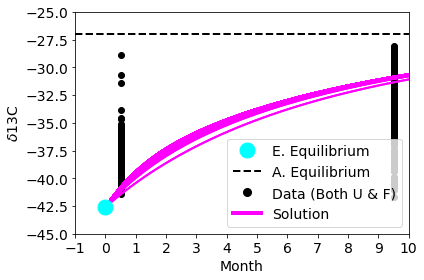

<Figure size 432x288 with 0 Axes>

In [97]:
#Compare model to data

twopoolsolns_fig = plt.figure()

ts_new = np.linspace(0,10,100)

bestSumFS = np.zeros((len(bothed13Cvals),len(ts_new)),dtype='float') 

k1_arr = np.concatenate([k1_arr_A, k1_arr_B])

for i in range(len(k1_arr)):
    bestSumFS[i] = SumFS(bestalpha, besth, bestFeq, k1_arr[i], k2, ts_new)

for i in range(len(bothed13Cvals)):
    plt.plot(ts_new,bestSumFS[i],c='magenta',linewidth=2)

#Replot data

plt.plot(bothed13C_month0_A[0],bothed13C_month0_A[1],'o',markersize=15,color='cyan')

plt.scatter(*zip(*ued13C_month0_5_A),color='black')
plt.scatter(*zip(*fed13C_month0_5_A),color='black')
plt.scatter(*zip(*ued13C_month9_5_B),color='black')
plt.scatter(*zip(*fed13C_month9_5_B),color='black')

#Equilibrium

plt.plot(ts_A,showd13C_eq,'k--',linewidth=2)

#Format

plt.xlabel('Month',fontsize=14)
plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('$\delta$13C',fontsize=14)
plt.xlim((-1,10))
plt.ylim((-45.0,-25.0))

plt.xticks(size=14)
plt.yticks(size=14)

label13 = mlines.Line2D([], [], label='E. Equilibrium', color='cyan', marker='o',markersize=15,ls='')
label14 = mlines.Line2D([], [], label='A. Equilibrium', color='black', ls='--',lw=2)
label15 = mlines.Line2D([], [], label='Data (Both U & F)', color='black', marker='o',markersize=8,ls='')
label16 = mlines.Line2D([], [], label='Solution', color='magenta', ls='-',lw=4)


plt.legend(handles=[label13,label14,label15,label16],prop={'size': 14})

twopoolsolns_fig = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
twopoolsolns_fig.savefig("twopoolsolns_fig.png",dpi=100)

In [98]:
print('Parameter values: alpha = ',bestalpha,' h =',besth,' Feq =',bestFeq)

Parameter values: alpha =  -19.961580971051788  h = 0.5746345250952318  Feq = -10.0384191060472


$$\text{Plotted: } F(t) + S(t)$$

$$$$

$$
\begin{align*}
\begin{split}
F(t) & = \left(\alpha - F_{\text{eq}}\right)e^{-k_1 t} + F_{\text{eq}} \\
S(t) & = \frac{hk_1}{k_2 - k_1}\left(\alpha - F_{\text{eq}}\right)\left(e^{-k_1 t} - e^{-k_2 t}\right) + \left(-15.6 - \alpha + F_{\text{eq}} \right)e^{-k_2 t} - 27 - F_{\text{eq}}
\end{split}
\end{align*}
$$

$$$$

$$
\begin{align*}
\begin{split}
F(t) & = \left(-19.96 - -10.04\right)e^{-k_1 t} - 10.04 \\
S(t) & = \frac{0.57 k_1}{k_2 - k_1}\left(-19.96 - -10.04\right)\left(e^{-k_1 t} - e^{-k_2 t}\right) + \left(-15.6 - -19.96 - 10.04 \right)e^{-k_2 t} - 27 - -10.04
\end{split}
\end{align*}
$$


$$$$

$$
\begin{align*}
\begin{split}
F(t) & = -9.92e^{-k_1 t} - 10.04 \\
S(t) & = \frac{-5.65 k_1}{k_2 - k_1}\left(e^{-k_1 t} - e^{-k_2 t}\right) - 5.68e^{-k_2 t} - 16.96
\end{split}
\end{align*}
$$

# 4. ROOT DIAMETER

In [99]:
diams_bothe = np.concatenate([diams_bothe_A,diams_bothe_B])
print(np.average(diams_bothe))

0.5241924637681159


In [100]:
#BOOLEANS

order1 = (df["Order"] == 1)
order2 = (df["Order"] == 2)
order3 = (df["Order"] == 3)
order4 = (df["Order"] == 4)
order5 = (df["Order"] == 5)

#Make arrays

order1diams = df["AvgDiam.mm"][order1].to_numpy()
order2diams = df["AvgDiam.mm"][order2].to_numpy()
order3diams = df["AvgDiam.mm"][order3].to_numpy()
order4diams = df["AvgDiam.mm"][order4].to_numpy()
order5diams = df["AvgDiam.mm"][order5].to_numpy()

#Make one array with five inner arrays

diamsallorders = [order1diams, order2diams, order3diams, order4diams, order5diams]

#Check lengths

print(len(order1diams) + len(order2diams) + len(order3diams) + len(order4diams) + len(order5diams))
print(len(df))

455
455


<Figure size 432x288 with 0 Axes>

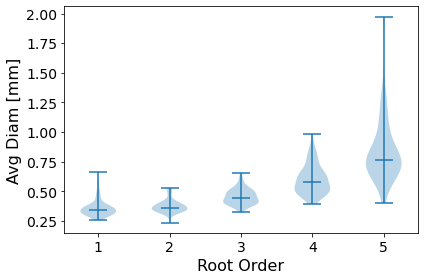

<Figure size 432x288 with 0 Axes>

In [101]:
#Violin plot

diamsviolin = plt.figure()

fig, ax = plt.subplots()
ax.violinplot(diamsallorders, showmedians=True)
ax.set_xlabel('Root Order',fontsize=16)
ax.set_ylabel('Avg Diam [mm]',fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)

diamsviolin = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
diamsviolin.savefig("diamsviolin.png",dpi=100)

In [102]:
#Make arrays

order1s = df["d13C"][order1].to_numpy()
order2s = df["d13C"][order2].to_numpy()
order3s = df["d13C"][order3].to_numpy()
order4s = df["d13C"][order4].to_numpy()
order5s = df["d13C"][order5].to_numpy()

#No. of samples by root order

print('Number of samples by root order')
print('Order 1: ',len(order1s))
print('Order 2: ',len(order2s))
print('Order 3: ',len(order3s))
print('Order 4: ',len(order4s))
print('Order 5: ',len(order5s))

#Find the average diameter for each root order

alldiams_order1 = np.concatenate([diams1,diams6,diams11,diams16])
alldiams_order2 = np.concatenate([diams2,diams7,diams12,diams17])
alldiams_order3 = np.concatenate([diams3,diams8,diams13,diams18])
alldiams_order4 = np.concatenate([diams4,diams9,diams14,diams19])
alldiams_order5 = np.concatenate([diams5,diams10,diams15,diams20])

print('Average diameter for each root order')
print('Order 1: ',np.average(alldiams_order1))
print('Order 2: ',np.average(alldiams_order2))
print('Order 3: ',np.average(alldiams_order3))
print('Order 4: ',np.average(alldiams_order4))
print('Order 5: ',np.average(alldiams_order5))

#Find the range for each root order

print('Range for each root order')
print('Order 1: ','[',np.min(alldiams_order1),',',np.max(alldiams_order1),']')
print('Order 2: ','[',np.min(alldiams_order2),',',np.max(alldiams_order2),']')
print('Order 3: ','[',np.min(alldiams_order3),',',np.max(alldiams_order3),']')
print('Order 4: ','[',np.min(alldiams_order4),',',np.max(alldiams_order4),']')
print('Order 5: ','[',np.min(alldiams_order5),',',np.max(alldiams_order5),']')

Number of samples by root order
Order 1:  90
Order 2:  92
Order 3:  92
Order 4:  93
Order 5:  88
Average diameter for each root order
Order 1:  0.3469621212121213
Order 2:  0.36948857142857144
Order 3:  0.4499957142857143
Order 4:  0.5966366197183098
Order 5:  0.8562029411764706
Range for each root order
Order 1:  [ 0.2553000000000001 , 0.5045 ]
Order 2:  [ 0.2368 , 0.5292 ]
Order 3:  [ 0.3304 , 0.5886 ]
Order 4:  [ 0.433 , 0.9804 ]
Order 5:  [ 0.5567000000000001 , 1.9731 ]
